In [1]:
VERSION = 34

FOCAL_LOSS = 0
CLOUD_SINGLE = True
MIXUP = False
NO_BLACK_LOSS = True
DATA_SMALL = False

In [2]:
if VERSION in [31,32]:
    TRAIN_ON_STAGE_1 = False
else:
    TRAIN_ON_STAGE_1 = True

if VERSION in [32,34,36]:
    WEIGHTED = True
else:
    WEIGHTED = False

In [3]:
%run ./Code.ipynb

In [4]:
if VERSION in [31,32]:
    # old features, no stage2 training
    train_md, test_md = loadMetadata()
elif VERSION in [33,34]:
    # old features, with stage2 training
    train_md, test_md = loadMetadata3()
elif VERSION in [35,36]:
    # new features
    train_md, test_md = loadMetadata2()

# OOF

In [21]:
stg = time.time()
for ds in (my_datasets3 + my_datasets5):
    folds = getNFolds(ds)
    for fold in range(folds):
        #pp = pickle.load(open(PATH_DISK/'ensemble/oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'rb'))
        predictions = oof_one(num_iter=32, bs=32, fold=fold, dataset=ds)
        #predictions = np.concatenate([pp,predictions],axis=0)
        pickle.dump(predictions, open(PATH_DISK/'ensemble/oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'wb'))
        print('total time', time.time() - stg)

completed epochs: 3 iters starting now: 32
adding dummy serieses 14
DataSet 7 valid size 7232 fold 0
dataset valid: 7232 loader valid: 226
loading model model.b3.f0.d7.v34
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.039 time per batch: 0.221
Batch 100 device: cuda time passed: 19.674 time per batch: 0.197
Batch 150 device: cuda time passed: 28.256 time per batch: 0.188
Batch 200 device: cuda time passed: 36.735 time per batch: 0.184
ver 34, iter 0, fold 0, val ll: 0.0629, cor: 0.8425, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.369 time per batch: 0.227
Batch 100 device: cuda time passed: 19.874 time per batch: 0.199
Batch 150 device: cuda time passed: 28.322 time per batch: 0.189
Batch 200 device: cuda time passed: 36.820 time per batch: 0.184
ver 34, iter 1, fold 0, val ll: 0.0633, cor: 0.8416, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.085 time per batch: 0.222
Batch 100 device: cuda time passed: 19

Batch 50 device: cuda time passed: 11.373 time per batch: 0.227
Batch 100 device: cuda time passed: 19.848 time per batch: 0.198
Batch 150 device: cuda time passed: 28.645 time per batch: 0.191
Batch 200 device: cuda time passed: 37.166 time per batch: 0.186
ver 34, iter 23, fold 0, val ll: 0.0631, cor: 0.8424, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.732 time per batch: 0.235
Batch 100 device: cuda time passed: 20.379 time per batch: 0.204
Batch 150 device: cuda time passed: 28.964 time per batch: 0.193
Batch 200 device: cuda time passed: 37.185 time per batch: 0.186
ver 34, iter 24, fold 0, val ll: 0.0632, cor: 0.8421, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.942 time per batch: 0.219
Batch 100 device: cuda time passed: 19.584 time per batch: 0.196
Batch 150 device: cuda time passed: 27.962 time per batch: 0.186
Batch 200 device: cuda time passed: 36.295 time per batch: 0.181
ver 34, iter 25, fold 0, val ll: 0.0631

ver 34, iter 13, fold 1, val ll: 0.0642, cor: 0.8353, auc: 0.9876
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.934 time per batch: 0.219
Batch 100 device: cuda time passed: 19.565 time per batch: 0.196
Batch 150 device: cuda time passed: 28.726 time per batch: 0.192
Batch 200 device: cuda time passed: 37.472 time per batch: 0.187
ver 34, iter 14, fold 1, val ll: 0.0644, cor: 0.8351, auc: 0.9875
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.664 time per batch: 0.233
Batch 100 device: cuda time passed: 20.181 time per batch: 0.202
Batch 150 device: cuda time passed: 28.592 time per batch: 0.191
Batch 200 device: cuda time passed: 37.140 time per batch: 0.186
ver 34, iter 15, fold 1, val ll: 0.0642, cor: 0.8355, auc: 0.9876
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.248 time per batch: 0.225
Batch 100 device: cuda time passed: 19.746 time per batch: 0.197
Batch 150 device: cuda time passed: 28.334 time per batch: 0.189
Batch 200 de

Batch 200 device: cuda time passed: 35.943 time per batch: 0.180
ver 34, iter 4, fold 2, val ll: 0.0602, cor: 0.8425, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.082 time per batch: 0.222
Batch 100 device: cuda time passed: 19.942 time per batch: 0.199
Batch 150 device: cuda time passed: 28.129 time per batch: 0.188
Batch 200 device: cuda time passed: 36.673 time per batch: 0.183
ver 34, iter 5, fold 2, val ll: 0.0602, cor: 0.8423, auc: 0.9894
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.475 time per batch: 0.229
Batch 100 device: cuda time passed: 19.975 time per batch: 0.200
Batch 150 device: cuda time passed: 28.403 time per batch: 0.189
Batch 200 device: cuda time passed: 36.868 time per batch: 0.184
ver 34, iter 6, fold 2, val ll: 0.0603, cor: 0.8420, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.274 time per batch: 0.225
Batch 100 device: cuda time passed: 19.953 time per batch: 0.200
Batch 150 devic

Batch 50 device: cuda time passed: 10.998 time per batch: 0.220
Batch 100 device: cuda time passed: 19.483 time per batch: 0.195
Batch 150 device: cuda time passed: 27.915 time per batch: 0.186
Batch 200 device: cuda time passed: 36.732 time per batch: 0.184
ver 34, iter 28, fold 2, val ll: 0.0602, cor: 0.8424, auc: 0.9894
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.019 time per batch: 0.220
Batch 100 device: cuda time passed: 19.728 time per batch: 0.197
Batch 150 device: cuda time passed: 28.105 time per batch: 0.187
Batch 200 device: cuda time passed: 36.333 time per batch: 0.182
ver 34, iter 29, fold 2, val ll: 0.0603, cor: 0.8420, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.334 time per batch: 0.227
Batch 100 device: cuda time passed: 19.885 time per batch: 0.199
Batch 150 device: cuda time passed: 28.419 time per batch: 0.189
Batch 200 device: cuda time passed: 36.882 time per batch: 0.184
ver 34, iter 30, fold 2, val ll: 0.0602

ver 34, iter 18, fold 0, val ll: 0.0632, cor: 0.8414, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.382 time per batch: 0.208
Batch 100 device: cuda time passed: 18.828 time per batch: 0.188
Batch 150 device: cuda time passed: 28.774 time per batch: 0.192
Batch 200 device: cuda time passed: 36.504 time per batch: 0.183
ver 34, iter 19, fold 0, val ll: 0.0632, cor: 0.8415, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.459 time per batch: 0.229
Batch 100 device: cuda time passed: 19.702 time per batch: 0.197
Batch 150 device: cuda time passed: 27.777 time per batch: 0.185
Batch 200 device: cuda time passed: 36.381 time per batch: 0.182
ver 34, iter 20, fold 0, val ll: 0.0634, cor: 0.8413, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.382 time per batch: 0.228
Batch 100 device: cuda time passed: 19.343 time per batch: 0.193
Batch 150 device: cuda time passed: 27.549 time per batch: 0.184
Batch 200 de

Batch 200 device: cuda time passed: 36.950 time per batch: 0.185
ver 34, iter 9, fold 1, val ll: 0.0630, cor: 0.8392, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.309 time per batch: 0.206
Batch 100 device: cuda time passed: 19.247 time per batch: 0.192
Batch 150 device: cuda time passed: 27.463 time per batch: 0.183
Batch 200 device: cuda time passed: 36.078 time per batch: 0.180
ver 34, iter 10, fold 1, val ll: 0.0634, cor: 0.8387, auc: 0.9878
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.580 time per batch: 0.212
Batch 100 device: cuda time passed: 18.971 time per batch: 0.190
Batch 150 device: cuda time passed: 27.962 time per batch: 0.186
Batch 200 device: cuda time passed: 35.981 time per batch: 0.180
ver 34, iter 11, fold 1, val ll: 0.0632, cor: 0.8391, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.003 time per batch: 0.220
Batch 100 device: cuda time passed: 19.562 time per batch: 0.196
Batch 150 dev

Batch 150 device: cuda time passed: 28.448 time per batch: 0.190
Batch 200 device: cuda time passed: 36.151 time per batch: 0.181
ver 34, iter 0, fold 2, val ll: 0.0604, cor: 0.8411, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.055 time per batch: 0.221
Batch 100 device: cuda time passed: 19.589 time per batch: 0.196
Batch 150 device: cuda time passed: 27.452 time per batch: 0.183
Batch 200 device: cuda time passed: 35.844 time per batch: 0.179
ver 34, iter 1, fold 2, val ll: 0.0603, cor: 0.8412, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.997 time per batch: 0.220
Batch 100 device: cuda time passed: 19.403 time per batch: 0.194
Batch 150 device: cuda time passed: 27.832 time per batch: 0.186
Batch 200 device: cuda time passed: 36.258 time per batch: 0.181
ver 34, iter 2, fold 2, val ll: 0.0603, cor: 0.8413, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.043 time per batch: 0.221
Batch 100 devic

ver 34, iter 23, fold 2, val ll: 0.0603, cor: 0.8414, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.914 time per batch: 0.218
Batch 100 device: cuda time passed: 19.576 time per batch: 0.196
Batch 150 device: cuda time passed: 27.771 time per batch: 0.185
Batch 200 device: cuda time passed: 35.991 time per batch: 0.180
ver 34, iter 24, fold 2, val ll: 0.0605, cor: 0.8410, auc: 0.9891
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.077 time per batch: 0.222
Batch 100 device: cuda time passed: 19.416 time per batch: 0.194
Batch 150 device: cuda time passed: 27.528 time per batch: 0.184
Batch 200 device: cuda time passed: 35.811 time per batch: 0.179
ver 34, iter 25, fold 2, val ll: 0.0603, cor: 0.8415, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.948 time per batch: 0.219
Batch 100 device: cuda time passed: 19.157 time per batch: 0.192
Batch 150 device: cuda time passed: 27.678 time per batch: 0.185
Batch 200 de

Batch 100 device: cuda time passed: 14.021 time per batch: 0.140
ver 34, iter 23, fold 0, val ll: 0.0608, cor: 0.8453, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.490 time per batch: 0.150
Batch 100 device: cuda time passed: 13.991 time per batch: 0.140
ver 34, iter 24, fold 0, val ll: 0.0609, cor: 0.8450, auc: 0.9888
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.355 time per batch: 0.167
Batch 100 device: cuda time passed: 14.456 time per batch: 0.145
ver 34, iter 25, fold 0, val ll: 0.0608, cor: 0.8452, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.871 time per batch: 0.177
Batch 100 device: cuda time passed: 15.260 time per batch: 0.153
ver 34, iter 26, fold 0, val ll: 0.0608, cor: 0.8451, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.760 time per batch: 0.155
Batch 100 device: cuda time passed: 14.599 time per batch: 0.146
ver 34, iter 27, fold 0, val ll: 0.0609, cor: 0.8450, a

ver 34, iter 27, fold 1, val ll: 0.0599, cor: 0.8462, auc: 0.9897
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.806 time per batch: 0.156
Batch 100 device: cuda time passed: 14.135 time per batch: 0.141
ver 34, iter 28, fold 1, val ll: 0.0598, cor: 0.8464, auc: 0.9897
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.158 time per batch: 0.163
Batch 100 device: cuda time passed: 14.689 time per batch: 0.147
ver 34, iter 29, fold 1, val ll: 0.0598, cor: 0.8465, auc: 0.9897
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.615 time per batch: 0.172
Batch 100 device: cuda time passed: 14.820 time per batch: 0.148
ver 34, iter 30, fold 1, val ll: 0.0594, cor: 0.8474, auc: 0.9898
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.738 time per batch: 0.175
Batch 100 device: cuda time passed: 15.174 time per batch: 0.152
ver 34, iter 31, fold 1, val ll: 0.0595, cor: 0.8472, auc: 0.9898
total running time 721.0183691978455
total time 11170.

total time 11922.615085601807
completed epochs: 3 iters starting now: 32
adding dummy serieses 16
DataSet 11 valid size 4352 fold 3
dataset valid: 4352 loader valid: 136
loading model model.b3.f3.d11.v34
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.425 time per batch: 0.168
Batch 100 device: cuda time passed: 14.529 time per batch: 0.145
ver 34, iter 0, fold 3, val ll: 0.0630, cor: 0.8408, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.520 time per batch: 0.170
Batch 100 device: cuda time passed: 14.945 time per batch: 0.149
ver 34, iter 1, fold 3, val ll: 0.0631, cor: 0.8410, auc: 0.9886
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.122 time per batch: 0.162
Batch 100 device: cuda time passed: 14.718 time per batch: 0.147
ver 34, iter 2, fold 3, val ll: 0.0632, cor: 0.8404, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.313 time per batch: 0.166
Batch 100 device: cuda time passed: 14.583 time pe

Batch 100 device: cuda time passed: 14.614 time per batch: 0.146
ver 34, iter 3, fold 4, val ll: 0.0621, cor: 0.8423, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.994 time per batch: 0.160
Batch 100 device: cuda time passed: 14.679 time per batch: 0.147
ver 34, iter 4, fold 4, val ll: 0.0621, cor: 0.8424, auc: 0.9883
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.531 time per batch: 0.151
Batch 100 device: cuda time passed: 14.144 time per batch: 0.141
ver 34, iter 5, fold 4, val ll: 0.0622, cor: 0.8423, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.704 time per batch: 0.154
Batch 100 device: cuda time passed: 14.333 time per batch: 0.143
ver 34, iter 6, fold 4, val ll: 0.0621, cor: 0.8422, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.156 time per batch: 0.163
Batch 100 device: cuda time passed: 14.257 time per batch: 0.143
ver 34, iter 7, fold 4, val ll: 0.0620, cor: 0.8423, auc: 0

ver 34, iter 7, fold 0, val ll: 0.0609, cor: 0.8444, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.895 time per batch: 0.158
Batch 100 device: cuda time passed: 14.094 time per batch: 0.141
ver 34, iter 8, fold 0, val ll: 0.0611, cor: 0.8444, auc: 0.9886
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.393 time per batch: 0.168
Batch 100 device: cuda time passed: 14.507 time per batch: 0.145
ver 34, iter 9, fold 0, val ll: 0.0610, cor: 0.8446, auc: 0.9888
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.617 time per batch: 0.172
Batch 100 device: cuda time passed: 14.751 time per batch: 0.148
ver 34, iter 10, fold 0, val ll: 0.0610, cor: 0.8447, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.839 time per batch: 0.157
Batch 100 device: cuda time passed: 14.319 time per batch: 0.143
ver 34, iter 11, fold 0, val ll: 0.0611, cor: 0.8444, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time pass

Batch 50 device: cuda time passed: 8.393 time per batch: 0.168
Batch 100 device: cuda time passed: 14.742 time per batch: 0.147
ver 34, iter 12, fold 1, val ll: 0.0595, cor: 0.8458, auc: 0.9898
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.863 time per batch: 0.157
Batch 100 device: cuda time passed: 13.937 time per batch: 0.139
ver 34, iter 13, fold 1, val ll: 0.0597, cor: 0.8454, auc: 0.9898
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.618 time per batch: 0.152
Batch 100 device: cuda time passed: 14.623 time per batch: 0.146
ver 34, iter 14, fold 1, val ll: 0.0594, cor: 0.8458, auc: 0.9898
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.221 time per batch: 0.164
Batch 100 device: cuda time passed: 14.541 time per batch: 0.145
ver 34, iter 15, fold 1, val ll: 0.0596, cor: 0.8456, auc: 0.9897
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.317 time per batch: 0.166
Batch 100 device: cuda time passed: 14.128 time per batch

Batch 100 device: cuda time passed: 15.089 time per batch: 0.151
ver 34, iter 16, fold 2, val ll: 0.0605, cor: 0.8425, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.920 time per batch: 0.158
Batch 100 device: cuda time passed: 14.389 time per batch: 0.144
ver 34, iter 17, fold 2, val ll: 0.0603, cor: 0.8430, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.102 time per batch: 0.162
Batch 100 device: cuda time passed: 14.775 time per batch: 0.148
ver 34, iter 18, fold 2, val ll: 0.0604, cor: 0.8428, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.398 time per batch: 0.168
Batch 100 device: cuda time passed: 14.497 time per batch: 0.145
ver 34, iter 19, fold 2, val ll: 0.0603, cor: 0.8435, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.201 time per batch: 0.164
Batch 100 device: cuda time passed: 15.056 time per batch: 0.151
ver 34, iter 20, fold 2, val ll: 0.0602, cor: 0.8432, a

ver 34, iter 20, fold 3, val ll: 0.0627, cor: 0.8404, auc: 0.9886
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.006 time per batch: 0.160
Batch 100 device: cuda time passed: 14.026 time per batch: 0.140
ver 34, iter 21, fold 3, val ll: 0.0628, cor: 0.8402, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.349 time per batch: 0.167
Batch 100 device: cuda time passed: 14.435 time per batch: 0.144
ver 34, iter 22, fold 3, val ll: 0.0627, cor: 0.8403, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.184 time per batch: 0.164
Batch 100 device: cuda time passed: 14.495 time per batch: 0.145
ver 34, iter 23, fold 3, val ll: 0.0627, cor: 0.8403, auc: 0.9888
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.872 time per batch: 0.157
Batch 100 device: cuda time passed: 14.538 time per batch: 0.145
ver 34, iter 24, fold 3, val ll: 0.0623, cor: 0.8408, auc: 0.9888
setFeats, augmentation -1
Batch 50 device: cuda time p

Batch 50 device: cuda time passed: 8.386 time per batch: 0.168
Batch 100 device: cuda time passed: 14.843 time per batch: 0.148
ver 34, iter 25, fold 4, val ll: 0.0610, cor: 0.8443, auc: 0.9885
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.176 time per batch: 0.164
Batch 100 device: cuda time passed: 14.860 time per batch: 0.149
ver 34, iter 26, fold 4, val ll: 0.0614, cor: 0.8437, auc: 0.9883
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.796 time per batch: 0.156
Batch 100 device: cuda time passed: 14.797 time per batch: 0.148
ver 34, iter 27, fold 4, val ll: 0.0611, cor: 0.8441, auc: 0.9885
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.082 time per batch: 0.162
Batch 100 device: cuda time passed: 14.366 time per batch: 0.144
ver 34, iter 28, fold 4, val ll: 0.0611, cor: 0.8444, auc: 0.9884
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.765 time per batch: 0.155
Batch 100 device: cuda time passed: 14.102 time per batch

Batch 100 device: cuda time passed: 14.007 time per batch: 0.140
ver 34, iter 29, fold 0, val ll: 0.0608, cor: 0.8444, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.859 time per batch: 0.157
Batch 100 device: cuda time passed: 14.598 time per batch: 0.146
ver 34, iter 30, fold 0, val ll: 0.0610, cor: 0.8436, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.346 time per batch: 0.167
Batch 100 device: cuda time passed: 14.582 time per batch: 0.146
ver 34, iter 31, fold 0, val ll: 0.0610, cor: 0.8437, auc: 0.9889
total running time 753.0968706607819
total time 17880.959055662155
completed epochs: 3 iters starting now: 32
adding dummy serieses 12
DataSet 13 valid size 4288 fold 1
dataset valid: 4288 loader valid: 134
loading model model.b3.f1.d13.v34
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.968 time per batch: 0.159
Batch 100 device: cuda time passed: 14.655 time per batch: 0.147
ver 34, iter 0, fold 1, val ll: 0.

ver 34, iter 0, fold 2, val ll: 0.0602, cor: 0.8434, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.255 time per batch: 0.165
Batch 100 device: cuda time passed: 14.489 time per batch: 0.145
ver 34, iter 1, fold 2, val ll: 0.0601, cor: 0.8435, auc: 0.9891
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.208 time per batch: 0.164
Batch 100 device: cuda time passed: 14.743 time per batch: 0.147
ver 34, iter 2, fold 2, val ll: 0.0602, cor: 0.8432, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.759 time per batch: 0.155
Batch 100 device: cuda time passed: 14.327 time per batch: 0.143
ver 34, iter 3, fold 2, val ll: 0.0601, cor: 0.8439, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.998 time per batch: 0.160
Batch 100 device: cuda time passed: 14.599 time per batch: 0.146
ver 34, iter 4, fold 2, val ll: 0.0602, cor: 0.8431, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed

Batch 50 device: cuda time passed: 7.764 time per batch: 0.155
Batch 100 device: cuda time passed: 14.443 time per batch: 0.144
ver 34, iter 5, fold 3, val ll: 0.0630, cor: 0.8392, auc: 0.9886
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.046 time per batch: 0.161
Batch 100 device: cuda time passed: 14.542 time per batch: 0.145
ver 34, iter 6, fold 3, val ll: 0.0630, cor: 0.8400, auc: 0.9886
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.369 time per batch: 0.167
Batch 100 device: cuda time passed: 14.797 time per batch: 0.148
ver 34, iter 7, fold 3, val ll: 0.0629, cor: 0.8397, auc: 0.9886
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.385 time per batch: 0.168
Batch 100 device: cuda time passed: 15.082 time per batch: 0.151
ver 34, iter 8, fold 3, val ll: 0.0630, cor: 0.8396, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.233 time per batch: 0.165
Batch 100 device: cuda time passed: 14.812 time per batch: 0.

Batch 100 device: cuda time passed: 14.850 time per batch: 0.149
ver 34, iter 9, fold 4, val ll: 0.0618, cor: 0.8418, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.651 time per batch: 0.173
Batch 100 device: cuda time passed: 14.415 time per batch: 0.144
ver 34, iter 10, fold 4, val ll: 0.0617, cor: 0.8423, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.635 time per batch: 0.153
Batch 100 device: cuda time passed: 15.063 time per batch: 0.151
ver 34, iter 11, fold 4, val ll: 0.0617, cor: 0.8423, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.388 time per batch: 0.168
Batch 100 device: cuda time passed: 14.779 time per batch: 0.148
ver 34, iter 12, fold 4, val ll: 0.0618, cor: 0.8418, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.871 time per batch: 0.157
Batch 100 device: cuda time passed: 14.803 time per batch: 0.148
ver 34, iter 13, fold 4, val ll: 0.0617, cor: 0.8418, au

In [ ]:
#range(6,13) x8
#5113.189187049866
#20878.715314388275

In [12]:
#total running time 1201.68962931633
#total time 15020.348212480545

4.231111111111111

In [11]:
preds_all = getPredsOOF(aug=32,datasets=my_datasets3,datasets5=my_datasets5,ver=33)

In [20]:
preds_all.shape

(6, 32, 752797, 6)

In [13]:
preds_all2 = getPredsOOF(aug=32,datasets=[],datasets5=[14],ver=35)

In [14]:
preds_all2.shape

(1, 32, 752797, 6)

In [19]:
preds_all = np.concatenate([preds_all, preds_all2], axis=0)

In [21]:
# weighted 
# [0.15059251, 0.00462303, 0.05034504, 0.03602126, 0.04910235, 0.06661193]

# non-weighted
# [0.14268919, 0.00409448, 0.04815497, 0.03553187, 0.04749233, 0.06196157]

# non-weighted stage2
# [0.14308659, 0.00427111, 0.04815908, 0.03493501, 0.04749543, 0.06258626]

preds_all.mean((0,1,2))

array([0.14308659, 0.00427111, 0.04815908, 0.03493501, 0.04749543,
       0.06258626])

In [22]:
names_y = [
    #'model_Densenet201_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    #'model_Densenet161_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_Densenet169_3_version_classifier_splits_fullhead_resmodel_pool2_stage2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnext101_32x4d_version_classifier_splits_fullhead_resmodel_pool2_stage2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_classifier_splits_fullhead_resmodel_pool2_stage2_3_type_OOF_pred_split_{}.pkl'
]

In [23]:
names_y5 = [
    'model_se_resnext101_32x4d_version_new_splits_fullhead_resmodel_pool2_stage2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_new_splits_fullhead_resmodel_pool2_stage2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_new_splits_focal_fullhead_resmodel_pool2_stage2_over3_type_OOF_pred_split_{}.pkl',
]

In [27]:
preds_y = getYuvalOOF(train_md=train_md, names=names_y, names5=names_y5)

adding yuval_idx
adding yuval_idx


ValueError: all input arrays must have the same shape

In [10]:
preds_y.mean((0,1))

array([0.14324892, 0.00393972, 0.04744924, 0.03478716, 0.04725699,
       0.0627577 ])

In [11]:
preds_y.shape

(6, 674252, 6)

In [13]:
preds_all = np.concatenate([preds_all.mean(1), preds_y], axis=0)

In [36]:
preds_all = preds_all.mean(1)

In [14]:
del preds_y

In [15]:
preds_all.shape

(11, 674252, 6)

## Elimination

In [29]:
def getMaskedLoss(preds_all, mask, weighted):
    
    loss = ((- train_md[all_ich].values * np.log(preds_all[mask].mean(0)) \
            - (1 - train_md[all_ich].values) * np.log(1 - preds_all[mask].mean(0)))*class_weights)
    
    if weighted:
        loss = (loss * np.expand_dims(train_md['weights'].values,axis=1)).mean()
    else:
        loss = loss.mean()
    return loss

def produceDSMask(weighted):
    
    N = len(preds_all)
    ds_mask = np.ones(N, dtype=bool)
    best_loss = getMaskedLoss(preds_all, ds_mask, weighted)

    for i in range(N):
        worst_k = -1
        worst_loss = best_loss
        print('starting iter',i,'loss',best_loss,'eliminated',(~ds_mask).sum())
        for k in range(N):
            mask2 = ds_mask.copy()
            mask2[k] = False
            loss = getMaskedLoss(preds_all, mask2, weighted)
            if loss < worst_loss:
                worst_loss = loss
                worst_k = k
        if worst_k >= 0:
            print('eliminating',worst_k,'new loss',worst_loss)
            ds_mask[worst_k] = False
            best_loss = worst_loss
        else:
            break
    
    print('removed', np.where(~ds_mask)[0])
    
    return ds_mask

In [38]:
ds_mask1 = produceDSMask(False)
print('')
ds_mask2 = produceDSMask(True)

starting iter 0 loss 0.05797606594701529 eliminated 0
removed []

starting iter 0 loss 0.05479987306712943 eliminated 0
removed []


In [31]:
ds_mask = ds_mask1 | ds_mask2

In [32]:
ds_mask

array([ True,  True,  True,  True,  True, False])

In [33]:
preds_all = preds_all[ds_mask]
my_len = ds_mask[:my_len].sum()

In [34]:
my_len

5

## OOF analysis

In [37]:
np.set_printoptions(precision=3)

loss = (- train_md[all_ich].values * np.log(preds_all) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all)).mean(1)
for k in range(6):
    print('{:20s} {}'.format(all_ich[k],loss[:,k]))

any                  [0.099 0.098 0.096 0.096 0.096]
epidural             [0.017 0.017 0.015 0.016 0.016]
intraparenchymal     [0.043 0.042 0.041 0.042 0.042]
intraventricular     [0.026 0.026 0.025 0.025 0.025]
subarachnoid         [0.066 0.065 0.064 0.064 0.064]
subdural             [0.081 0.08  0.079 0.079 0.079]


In [22]:
print(preds_all.mean(1).transpose())

[[0.151 0.15  0.151 0.151 0.151 0.143 0.14  0.144 0.145 0.144 0.143]
 [0.003 0.004 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.004 0.004]
 [0.05  0.051 0.05  0.05  0.05  0.048 0.046 0.047 0.047 0.048 0.048]
 [0.036 0.037 0.035 0.036 0.036 0.035 0.034 0.035 0.034 0.035 0.035]
 [0.05  0.049 0.048 0.049 0.049 0.047 0.046 0.048 0.048 0.047 0.047]
 [0.068 0.065 0.067 0.067 0.067 0.062 0.062 0.063 0.064 0.063 0.063]]


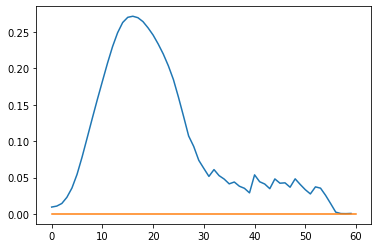

In [39]:
zz = preds_all.mean(0)[:,0]

train_md['prob'] = zz

plt.plot(train_md[['prob','pos_idx']].groupby('pos_idx').mean())
plt.plot([0,60],[0,0])

In [40]:
log_loss(train_md['any'],train_md['prob'])

0.09374523852664919

(0, 5)

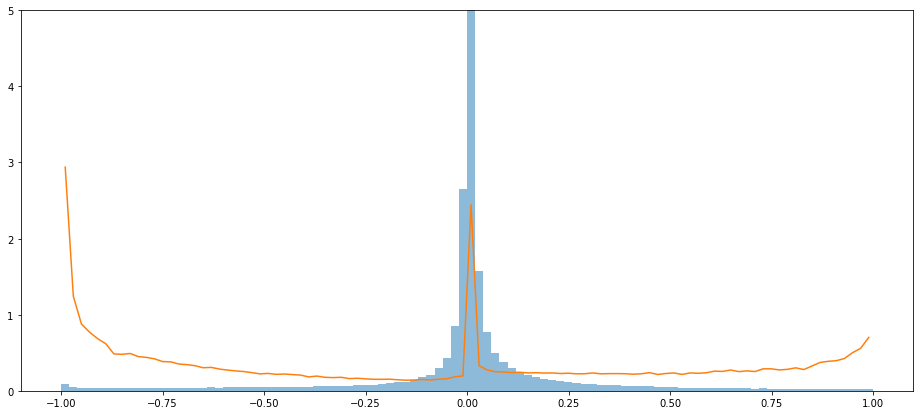

In [41]:
#zz = preds_all.mean(1)[0,:,0]
k=0
zz = preds_all.mean(0)[:,k]
#zz = preds_all[0,0,:,k]
#zz = scalePreds(zz,power=1.3)


plt.figure(figsize=(16, 7))
a = plt.hist(zz - train_md[all_ich[k]],bins=100,alpha=0.5,density=True)
b = 0.5*(a[1][1:] + a[1][:-1])
plt.plot(b,-7*np.log(1-abs(b))*a[0])
plt.ylim([0,5])

In [42]:
np.set_printoptions(precision=2)
zz = preds_all.mean(0)
for k in range(6):
    print(k,np.quantile(zz[:,k],[0.0001,0.001,0.01,0.5,0.99,0.999,0.9999]))

0 [1.10e-04 1.52e-04 2.04e-04 1.75e-03 9.97e-01 9.99e-01 1.00e+00]
1 [1.88e-05 2.39e-05 3.25e-05 1.35e-04 8.24e-02 4.02e-01 6.97e-01]
2 [4.66e-05 5.77e-05 7.73e-05 3.85e-04 9.81e-01 9.94e-01 9.96e-01]
3 [2.56e-05 3.19e-05 4.36e-05 2.01e-04 9.74e-01 9.91e-01 9.94e-01]
4 [7.03e-05 9.09e-05 1.23e-04 5.87e-04 9.52e-01 9.89e-01 9.94e-01]
5 [7.30e-05 1.02e-04 1.40e-04 9.74e-04 9.64e-01 9.91e-01 9.94e-01]


## Bounding

In [43]:
preds_all.shape

(5, 752797, 6)

In [44]:
loss = ((- train_md[all_ich].values * np.log(preds_all.mean(0)) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all.mean(0)))*class_weights).mean()
print(loss)

0.05797606594701529


In [45]:
preds_all = predBounding(preds_all, target=train_md[all_ich].values)

initial score 0.05797606594701529
any too low inconsistencies
1 class: 0.0032686102627932897
2 class: 0.019828453088946953
3 class: 0.01244452355681545
4 class: 0.038878475870653045
5 class: 0.08564486840409831
total 0.12761528008214698
any too low corrected score 0.05797285912598773
any too high inconsistencies
total 0.08336616644327753
any too high corrected score 0.05796933892780182


In [46]:
loss = ((- train_md[all_ich].values * np.log(preds_all.mean(0)) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all.mean(0)))*class_weights).mean()
print(loss)

0.05796933892780182


## Models behavior per groups

In [50]:
np.set_printoptions(precision=4)
for col in ['PxlMin_zero']:
    for i in train_md[col].unique():
        res = ((- train_md[all_ich].values * np.log(preds_all) - (1 - train_md[all_ich].values) \
                * np.log(1 - preds_all)) * class_weights)[:,(train_md[col] == i)].mean((1,2))
        sz = (train_md[col] == i).sum()
        sz_test = (test_md[col] == i).sum()
        print('{:2d}: {:6d} {:6d} {}'.format(i,sz,sz_test,res))

 0: 452096  84109 [0.0744 0.0738 0.0723 0.0724 0.0725]
 1: 300701  37123 [0.0418 0.0412 0.0406 0.0404 0.0408]


# Inference

In [5]:
stg = time.time()

for ds in (my_datasets3 + my_datasets5):
#for ds in [13]:
    folds = getNFolds(ds)
    preds = []
    for fold in range(folds):
        preds2 = []
        for anum in range(32):
            predictions = inference_one(fold = fold, anum = anum, bs=bs, dataset=ds)
            preds2.append(predictions)
        preds.append(np.stack(preds2))
    preds = np.stack(preds)
    print('total time', time.time() - stg)
    
    pickle.dump(preds, open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'wb'))

completed epochs: 3
loading model model.b3.f0.d7.v34
adding dummy serieses 2
DataSet 7 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 0
setFeats, augmentation -1
B10 -> time passed: 3.361 time per batch: 0.336
B20 -> time passed: 3.790 time per batch: 0.189
B30 -> time passed: 4.264 time per batch: 0.142
B40 -> time passed: 5.378 time per batch: 0.134
B50 -> time passed: 6.015 time per batch: 0.120
B60 -> time passed: 7.457 time per batch: 0.124
B70 -> time passed: 8.844 time per batch: 0.126
B80 -> time passed: 9.156 time per batch: 0.114
B90 -> time passed: 10.449 time per batch: 0.116
B100 -> time passed: 10.748 time per batch: 0.107
B110 -> time passed: 11.309 time per batch: 0.103
test processing time: 40.55601930618286
completed epochs: 3
loading model model.b3.f0.d7.v34
adding dummy serieses 2
DataSet 7 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 1
setFeats, augmentation -1
B10 -> time passed: 2.631 time per batch: 0.263
B20 -> time passed: 3

test processing time: 19.92565131187439
completed epochs: 3
loading model model.b3.f0.d7.v34
adding dummy serieses 2
DataSet 7 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 11
setFeats, augmentation -1
B10 -> time passed: 2.428 time per batch: 0.243
B20 -> time passed: 2.895 time per batch: 0.145
B30 -> time passed: 4.383 time per batch: 0.146
B40 -> time passed: 5.924 time per batch: 0.148
B50 -> time passed: 6.293 time per batch: 0.126
B60 -> time passed: 7.541 time per batch: 0.126
B70 -> time passed: 8.727 time per batch: 0.125
B80 -> time passed: 9.371 time per batch: 0.117
B90 -> time passed: 10.756 time per batch: 0.120
B100 -> time passed: 10.934 time per batch: 0.109
B110 -> time passed: 11.387 time per batch: 0.104
test processing time: 19.987247943878174
completed epochs: 3
loading model model.b3.f0.d7.v34
adding dummy serieses 2
DataSet 7 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 12
setFeats, augmentation -1
B10 -> time passed: 2.231 

B110 -> time passed: 11.134 time per batch: 0.101
test processing time: 19.83299469947815
completed epochs: 3
loading model model.b3.f0.d7.v34
adding dummy serieses 2
DataSet 7 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 22
setFeats, augmentation -1
B10 -> time passed: 2.043 time per batch: 0.204
B20 -> time passed: 3.323 time per batch: 0.166
B30 -> time passed: 3.818 time per batch: 0.127
B40 -> time passed: 5.160 time per batch: 0.129
B50 -> time passed: 6.597 time per batch: 0.132
B60 -> time passed: 7.076 time per batch: 0.118
B70 -> time passed: 8.473 time per batch: 0.121
B80 -> time passed: 9.002 time per batch: 0.113
B90 -> time passed: 10.321 time per batch: 0.115
B100 -> time passed: 11.045 time per batch: 0.110
B110 -> time passed: 11.152 time per batch: 0.101
test processing time: 19.88461422920227
completed epochs: 3
loading model model.b3.f0.d7.v34
adding dummy serieses 2
DataSet 7 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 23
set

B100 -> time passed: 11.402 time per batch: 0.114
B110 -> time passed: 11.570 time per batch: 0.105
test processing time: 36.4542338848114
completed epochs: 3
loading model model.b3.f1.d7.v34
adding dummy serieses 2
DataSet 7 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 1
setFeats, augmentation -1
B10 -> time passed: 1.952 time per batch: 0.195
B20 -> time passed: 3.179 time per batch: 0.159
B30 -> time passed: 3.659 time per batch: 0.122
B40 -> time passed: 4.992 time per batch: 0.125
B50 -> time passed: 6.030 time per batch: 0.121
B60 -> time passed: 6.738 time per batch: 0.112
B70 -> time passed: 7.838 time per batch: 0.112
B80 -> time passed: 8.478 time per batch: 0.106
B90 -> time passed: 9.663 time per batch: 0.107
B100 -> time passed: 10.584 time per batch: 0.106
B110 -> time passed: 10.969 time per batch: 0.100
test processing time: 28.804166078567505
completed epochs: 3
loading model model.b3.f1.d7.v34
adding dummy serieses 2
DataSet 7 test size 3520 fold 1


B90 -> time passed: 10.568 time per batch: 0.117
B100 -> time passed: 11.074 time per batch: 0.111
B110 -> time passed: 11.223 time per batch: 0.102
test processing time: 19.635953664779663
completed epochs: 3
loading model model.b3.f1.d7.v34
adding dummy serieses 2
DataSet 7 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 12
setFeats, augmentation -1
B10 -> time passed: 2.053 time per batch: 0.205
B20 -> time passed: 3.400 time per batch: 0.170
B30 -> time passed: 3.850 time per batch: 0.128
B40 -> time passed: 5.409 time per batch: 0.135
B50 -> time passed: 5.849 time per batch: 0.117
B60 -> time passed: 7.238 time per batch: 0.121
B70 -> time passed: 8.698 time per batch: 0.124
B80 -> time passed: 9.004 time per batch: 0.113
B90 -> time passed: 10.267 time per batch: 0.114
B100 -> time passed: 10.825 time per batch: 0.108
B110 -> time passed: 11.091 time per batch: 0.101
test processing time: 19.56740379333496
completed epochs: 3
loading model model.b3.f1.d7.v34
addi

B80 -> time passed: 8.509 time per batch: 0.106
B90 -> time passed: 10.023 time per batch: 0.111
B100 -> time passed: 10.967 time per batch: 0.110
B110 -> time passed: 11.048 time per batch: 0.100
test processing time: 19.570374011993408
completed epochs: 3
loading model model.b3.f1.d7.v34
adding dummy serieses 2
DataSet 7 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 23
setFeats, augmentation -1
B10 -> time passed: 2.052 time per batch: 0.205
B20 -> time passed: 3.095 time per batch: 0.155
B30 -> time passed: 3.600 time per batch: 0.120
B40 -> time passed: 4.952 time per batch: 0.124
B50 -> time passed: 6.134 time per batch: 0.123
B60 -> time passed: 6.728 time per batch: 0.112
B70 -> time passed: 7.993 time per batch: 0.114
B80 -> time passed: 8.697 time per batch: 0.109
B90 -> time passed: 9.736 time per batch: 0.108
B100 -> time passed: 10.755 time per batch: 0.108
B110 -> time passed: 10.931 time per batch: 0.099
test processing time: 19.49420714378357
completed 

B70 -> time passed: 8.038 time per batch: 0.115
B80 -> time passed: 8.408 time per batch: 0.105
B90 -> time passed: 9.964 time per batch: 0.111
B100 -> time passed: 10.934 time per batch: 0.109
B110 -> time passed: 11.014 time per batch: 0.100
test processing time: 27.727751970291138
completed epochs: 3
loading model model.b3.f2.d7.v34
adding dummy serieses 2
DataSet 7 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 2
setFeats, augmentation -1
B10 -> time passed: 1.999 time per batch: 0.200
B20 -> time passed: 3.470 time per batch: 0.173
B30 -> time passed: 3.874 time per batch: 0.129
B40 -> time passed: 5.085 time per batch: 0.127
B50 -> time passed: 6.413 time per batch: 0.128
B60 -> time passed: 6.894 time per batch: 0.115
B70 -> time passed: 8.157 time per batch: 0.117
B80 -> time passed: 8.595 time per batch: 0.107
B90 -> time passed: 9.894 time per batch: 0.110
B100 -> time passed: 10.947 time per batch: 0.109
B110 -> time passed: 11.081 time per batch: 0.101
test

B60 -> time passed: 6.702 time per batch: 0.112
B70 -> time passed: 8.313 time per batch: 0.119
B80 -> time passed: 8.728 time per batch: 0.109
B90 -> time passed: 10.051 time per batch: 0.112
B100 -> time passed: 10.937 time per batch: 0.109
B110 -> time passed: 11.017 time per batch: 0.100
test processing time: 19.556495666503906
completed epochs: 3
loading model model.b3.f2.d7.v34
adding dummy serieses 2
DataSet 7 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 13
setFeats, augmentation -1
B10 -> time passed: 1.766 time per batch: 0.177
B20 -> time passed: 3.102 time per batch: 0.155
B30 -> time passed: 3.661 time per batch: 0.122
B40 -> time passed: 5.075 time per batch: 0.127
B50 -> time passed: 6.796 time per batch: 0.136
B60 -> time passed: 7.159 time per batch: 0.119
B70 -> time passed: 8.492 time per batch: 0.121
B80 -> time passed: 8.869 time per batch: 0.111
B90 -> time passed: 10.080 time per batch: 0.112
B100 -> time passed: 10.922 time per batch: 0.109
B11

B40 -> time passed: 5.163 time per batch: 0.129
B50 -> time passed: 6.767 time per batch: 0.135
B60 -> time passed: 7.133 time per batch: 0.119
B70 -> time passed: 8.538 time per batch: 0.122
B80 -> time passed: 8.750 time per batch: 0.109
B90 -> time passed: 10.298 time per batch: 0.114
B100 -> time passed: 11.019 time per batch: 0.110
B110 -> time passed: 11.095 time per batch: 0.101
test processing time: 19.619443655014038
completed epochs: 3
loading model model.b3.f2.d7.v34
adding dummy serieses 2
DataSet 7 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 24
setFeats, augmentation -1
B10 -> time passed: 2.091 time per batch: 0.209
B20 -> time passed: 3.487 time per batch: 0.174
B30 -> time passed: 3.860 time per batch: 0.129
B40 -> time passed: 5.331 time per batch: 0.133
B50 -> time passed: 6.383 time per batch: 0.128
B60 -> time passed: 7.066 time per batch: 0.118
B70 -> time passed: 8.340 time per batch: 0.119
B80 -> time passed: 8.844 time per batch: 0.111
B90 ->

B20 -> time passed: 3.457 time per batch: 0.173
B30 -> time passed: 3.819 time per batch: 0.127
B40 -> time passed: 5.110 time per batch: 0.128
B50 -> time passed: 5.915 time per batch: 0.118
B60 -> time passed: 6.870 time per batch: 0.114
B70 -> time passed: 8.223 time per batch: 0.117
B80 -> time passed: 8.593 time per batch: 0.107
B90 -> time passed: 9.888 time per batch: 0.110
B100 -> time passed: 10.690 time per batch: 0.107
B110 -> time passed: 10.913 time per batch: 0.099
test processing time: 15.52775239944458
completed epochs: 3
loading model model.b3.f0.d9.v34
adding dummy serieses 2
DataSet 9 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 3
setFeats, augmentation -1
B10 -> time passed: 2.212 time per batch: 0.221
B20 -> time passed: 3.246 time per batch: 0.162
B30 -> time passed: 3.863 time per batch: 0.129
B40 -> time passed: 5.310 time per batch: 0.133
B50 -> time passed: 5.886 time per batch: 0.118
B60 -> time passed: 6.914 time per batch: 0.115
B70 -> ti

B10 -> time passed: 2.098 time per batch: 0.210
B20 -> time passed: 3.340 time per batch: 0.167
B30 -> time passed: 3.717 time per batch: 0.124
B40 -> time passed: 5.171 time per batch: 0.129
B50 -> time passed: 6.395 time per batch: 0.128
B60 -> time passed: 7.135 time per batch: 0.119
B70 -> time passed: 8.362 time per batch: 0.119
B80 -> time passed: 8.927 time per batch: 0.112
B90 -> time passed: 10.355 time per batch: 0.115
B100 -> time passed: 10.994 time per batch: 0.110
B110 -> time passed: 11.094 time per batch: 0.101
test processing time: 15.779311180114746
completed epochs: 3
loading model model.b3.f0.d9.v34
adding dummy serieses 2
DataSet 9 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 14
setFeats, augmentation -1
B10 -> time passed: 1.913 time per batch: 0.191
B20 -> time passed: 3.005 time per batch: 0.150
B30 -> time passed: 3.600 time per batch: 0.120
B40 -> time passed: 5.046 time per batch: 0.126
B50 -> time passed: 5.900 time per batch: 0.118
B60 ->

B10 -> time passed: 2.130 time per batch: 0.213
B20 -> time passed: 3.709 time per batch: 0.185
B30 -> time passed: 3.993 time per batch: 0.133
B40 -> time passed: 5.403 time per batch: 0.135
B50 -> time passed: 6.477 time per batch: 0.130
B60 -> time passed: 7.184 time per batch: 0.120
B70 -> time passed: 8.603 time per batch: 0.123
B80 -> time passed: 8.926 time per batch: 0.112
B90 -> time passed: 10.321 time per batch: 0.115
B100 -> time passed: 11.082 time per batch: 0.111
B110 -> time passed: 11.145 time per batch: 0.101
test processing time: 15.80700135231018
completed epochs: 3
loading model model.b3.f0.d9.v34
adding dummy serieses 2
DataSet 9 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 25
setFeats, augmentation -1
B10 -> time passed: 2.039 time per batch: 0.204
B20 -> time passed: 3.542 time per batch: 0.177
B30 -> time passed: 3.918 time per batch: 0.131
B40 -> time passed: 5.265 time per batch: 0.132
B50 -> time passed: 6.676 time per batch: 0.134
B60 -> 

B10 -> time passed: 2.132 time per batch: 0.213
B20 -> time passed: 3.282 time per batch: 0.164
B30 -> time passed: 3.689 time per batch: 0.123
B40 -> time passed: 5.034 time per batch: 0.126
B50 -> time passed: 5.960 time per batch: 0.119
B60 -> time passed: 7.113 time per batch: 0.119
B70 -> time passed: 8.110 time per batch: 0.116
B80 -> time passed: 8.776 time per batch: 0.110
B90 -> time passed: 10.004 time per batch: 0.111
B100 -> time passed: 10.767 time per batch: 0.108
B110 -> time passed: 10.913 time per batch: 0.099
test processing time: 15.62423849105835
completed epochs: 3
loading model model.b3.f1.d9.v34
adding dummy serieses 2
DataSet 9 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 4
setFeats, augmentation -1
B10 -> time passed: 2.051 time per batch: 0.205
B20 -> time passed: 3.294 time per batch: 0.165
B30 -> time passed: 3.689 time per batch: 0.123
B40 -> time passed: 5.065 time per batch: 0.127
B50 -> time passed: 6.229 time per batch: 0.125
B60 -> t

B10 -> time passed: 2.178 time per batch: 0.218
B20 -> time passed: 3.273 time per batch: 0.164
B30 -> time passed: 3.807 time per batch: 0.127
B40 -> time passed: 5.058 time per batch: 0.126
B50 -> time passed: 5.869 time per batch: 0.117
B60 -> time passed: 7.024 time per batch: 0.117
B70 -> time passed: 8.492 time per batch: 0.121
B80 -> time passed: 8.789 time per batch: 0.110
B90 -> time passed: 10.124 time per batch: 0.112
B100 -> time passed: 10.858 time per batch: 0.109
B110 -> time passed: 10.923 time per batch: 0.099
test processing time: 15.537496089935303
completed epochs: 3
loading model model.b3.f1.d9.v34
adding dummy serieses 2
DataSet 9 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 15
setFeats, augmentation -1
B10 -> time passed: 2.113 time per batch: 0.211
B20 -> time passed: 3.592 time per batch: 0.180
B30 -> time passed: 3.902 time per batch: 0.130
B40 -> time passed: 5.325 time per batch: 0.133
B50 -> time passed: 5.867 time per batch: 0.117
B60 ->

dataset test: 3520 loader test: 110 anum: 25
setFeats, augmentation -1
B10 -> time passed: 1.781 time per batch: 0.178
B20 -> time passed: 3.125 time per batch: 0.156
B30 -> time passed: 3.511 time per batch: 0.117
B40 -> time passed: 4.881 time per batch: 0.122
B50 -> time passed: 6.286 time per batch: 0.126
B60 -> time passed: 6.673 time per batch: 0.111
B70 -> time passed: 8.053 time per batch: 0.115
B80 -> time passed: 8.508 time per batch: 0.106
B90 -> time passed: 9.695 time per batch: 0.108
B100 -> time passed: 10.596 time per batch: 0.106
B110 -> time passed: 10.808 time per batch: 0.098
test processing time: 15.640642166137695
completed epochs: 3
loading model model.b3.f1.d9.v34
adding dummy serieses 2
DataSet 9 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 26
setFeats, augmentation -1
B10 -> time passed: 1.866 time per batch: 0.187
B20 -> time passed: 3.149 time per batch: 0.157
B30 -> time passed: 3.514 time per batch: 0.117
B40 -> time passed: 4.723 time p

adding dummy serieses 2
DataSet 9 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 4
setFeats, augmentation -1
B10 -> time passed: 1.989 time per batch: 0.199
B20 -> time passed: 3.374 time per batch: 0.169
B30 -> time passed: 3.723 time per batch: 0.124
B40 -> time passed: 5.122 time per batch: 0.128
B50 -> time passed: 5.867 time per batch: 0.117
B60 -> time passed: 6.786 time per batch: 0.113
B70 -> time passed: 8.118 time per batch: 0.116
B80 -> time passed: 8.452 time per batch: 0.106
B90 -> time passed: 9.851 time per batch: 0.109
B100 -> time passed: 10.680 time per batch: 0.107
B110 -> time passed: 10.828 time per batch: 0.098
test processing time: 15.621825456619263
completed epochs: 3
loading model model.b3.f2.d9.v34
adding dummy serieses 2
DataSet 9 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 5
setFeats, augmentation -1
B10 -> time passed: 1.850 time per batch: 0.185
B20 -> time passed: 3.232 time per batch: 0.162
B30 -> time passed: 3.600 

B10 -> time passed: 2.125 time per batch: 0.213
B20 -> time passed: 3.371 time per batch: 0.169
B30 -> time passed: 3.791 time per batch: 0.126
B40 -> time passed: 5.242 time per batch: 0.131
B50 -> time passed: 6.549 time per batch: 0.131
B60 -> time passed: 7.049 time per batch: 0.117
B70 -> time passed: 8.484 time per batch: 0.121
B80 -> time passed: 8.789 time per batch: 0.110
B90 -> time passed: 10.180 time per batch: 0.113
B100 -> time passed: 10.784 time per batch: 0.108
B110 -> time passed: 10.966 time per batch: 0.100
test processing time: 15.728445768356323
completed epochs: 3
loading model model.b3.f2.d9.v34
adding dummy serieses 2
DataSet 9 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 16
setFeats, augmentation -1
B10 -> time passed: 1.968 time per batch: 0.197
B20 -> time passed: 3.357 time per batch: 0.168
B30 -> time passed: 3.665 time per batch: 0.122
B40 -> time passed: 5.049 time per batch: 0.126
B50 -> time passed: 6.478 time per batch: 0.130
B60 ->

B10 -> time passed: 2.186 time per batch: 0.219
B20 -> time passed: 3.399 time per batch: 0.170
B30 -> time passed: 3.720 time per batch: 0.124
B40 -> time passed: 5.081 time per batch: 0.127
B50 -> time passed: 6.576 time per batch: 0.132
B60 -> time passed: 6.909 time per batch: 0.115
B70 -> time passed: 8.177 time per batch: 0.117
B80 -> time passed: 8.521 time per batch: 0.107
B90 -> time passed: 9.839 time per batch: 0.109
B100 -> time passed: 10.740 time per batch: 0.107
B110 -> time passed: 10.888 time per batch: 0.099
test processing time: 15.621280193328857
completed epochs: 3
loading model model.b3.f2.d9.v34
adding dummy serieses 2
DataSet 9 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 27
setFeats, augmentation -1
B10 -> time passed: 2.153 time per batch: 0.215
B20 -> time passed: 3.308 time per batch: 0.165
B30 -> time passed: 3.683 time per batch: 0.123
B40 -> time passed: 5.018 time per batch: 0.125
B50 -> time passed: 6.322 time per batch: 0.126
B60 -> 

B10 -> time passed: 2.121 time per batch: 0.212
B20 -> time passed: 3.370 time per batch: 0.168
B30 -> time passed: 3.823 time per batch: 0.127
B40 -> time passed: 5.109 time per batch: 0.128
B50 -> time passed: 6.118 time per batch: 0.122
B60 -> time passed: 6.890 time per batch: 0.115
B70 -> time passed: 8.396 time per batch: 0.120
B80 -> time passed: 8.781 time per batch: 0.110
B90 -> time passed: 9.966 time per batch: 0.111
B100 -> time passed: 10.591 time per batch: 0.106
B110 -> time passed: 10.826 time per batch: 0.098
test processing time: 15.516875267028809
completed epochs: 3
loading model model.b3.f0.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 6
setFeats, augmentation -1
B10 -> time passed: 2.133 time per batch: 0.213
B20 -> time passed: 3.245 time per batch: 0.162
B30 -> time passed: 3.608 time per batch: 0.120
B40 -> time passed: 5.193 time per batch: 0.130
B50 -> time passed: 6.917 time per batch: 0.138
B60 ->

B10 -> time passed: 1.976 time per batch: 0.198
B20 -> time passed: 3.192 time per batch: 0.160
B30 -> time passed: 3.635 time per batch: 0.121
B40 -> time passed: 4.926 time per batch: 0.123
B50 -> time passed: 6.045 time per batch: 0.121
B60 -> time passed: 6.686 time per batch: 0.111
B70 -> time passed: 7.811 time per batch: 0.112
B80 -> time passed: 8.395 time per batch: 0.105
B90 -> time passed: 9.769 time per batch: 0.109
B100 -> time passed: 10.611 time per batch: 0.106
B110 -> time passed: 10.812 time per batch: 0.098
test processing time: 15.595721960067749
completed epochs: 3
loading model model.b3.f0.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 17
setFeats, augmentation -1
B10 -> time passed: 2.127 time per batch: 0.213
B20 -> time passed: 3.447 time per batch: 0.172
B30 -> time passed: 3.747 time per batch: 0.125
B40 -> time passed: 5.105 time per batch: 0.128
B50 -> time passed: 5.800 time per batch: 0.116
B60 -

B10 -> time passed: 2.204 time per batch: 0.220
B20 -> time passed: 3.425 time per batch: 0.171
B30 -> time passed: 3.904 time per batch: 0.130
B40 -> time passed: 5.064 time per batch: 0.127
B50 -> time passed: 6.160 time per batch: 0.123
B60 -> time passed: 6.837 time per batch: 0.114
B70 -> time passed: 8.202 time per batch: 0.117
B80 -> time passed: 8.595 time per batch: 0.107
B90 -> time passed: 9.970 time per batch: 0.111
B100 -> time passed: 10.748 time per batch: 0.107
B110 -> time passed: 11.000 time per batch: 0.100
test processing time: 15.705693006515503
completed epochs: 3
loading model model.b3.f0.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 28
setFeats, augmentation -1
B10 -> time passed: 1.969 time per batch: 0.197
B20 -> time passed: 3.233 time per batch: 0.162
B30 -> time passed: 3.646 time per batch: 0.122
B40 -> time passed: 4.993 time per batch: 0.125
B50 -> time passed: 6.065 time per batch: 0.121
B60 -

B10 -> time passed: 1.968 time per batch: 0.197
B20 -> time passed: 3.248 time per batch: 0.162
B30 -> time passed: 3.776 time per batch: 0.126
B40 -> time passed: 4.919 time per batch: 0.123
B50 -> time passed: 5.741 time per batch: 0.115
B60 -> time passed: 7.072 time per batch: 0.118
B70 -> time passed: 8.296 time per batch: 0.119
B80 -> time passed: 8.715 time per batch: 0.109
B90 -> time passed: 10.025 time per batch: 0.111
B100 -> time passed: 10.839 time per batch: 0.108
B110 -> time passed: 10.913 time per batch: 0.099
test processing time: 15.583736658096313
completed epochs: 3
loading model model.b3.f1.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 7
setFeats, augmentation -1
B10 -> time passed: 1.810 time per batch: 0.181
B20 -> time passed: 3.094 time per batch: 0.155
B30 -> time passed: 3.651 time per batch: 0.122
B40 -> time passed: 4.929 time per batch: 0.123
B50 -> time passed: 6.180 time per batch: 0.124
B60 -

B10 -> time passed: 1.872 time per batch: 0.187
B20 -> time passed: 3.358 time per batch: 0.168
B30 -> time passed: 3.686 time per batch: 0.123
B40 -> time passed: 5.199 time per batch: 0.130
B50 -> time passed: 6.112 time per batch: 0.122
B60 -> time passed: 7.078 time per batch: 0.118
B70 -> time passed: 8.524 time per batch: 0.122
B80 -> time passed: 8.825 time per batch: 0.110
B90 -> time passed: 10.242 time per batch: 0.114
B100 -> time passed: 10.933 time per batch: 0.109
B110 -> time passed: 10.996 time per batch: 0.100
test processing time: 15.778000116348267
completed epochs: 3
loading model model.b3.f1.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 18
setFeats, augmentation -1
B10 -> time passed: 2.285 time per batch: 0.228
B20 -> time passed: 3.425 time per batch: 0.171
B30 -> time passed: 3.845 time per batch: 0.128
B40 -> time passed: 5.340 time per batch: 0.134
B50 -> time passed: 6.462 time per batch: 0.129
B60 

B10 -> time passed: 1.978 time per batch: 0.198
B20 -> time passed: 3.013 time per batch: 0.151
B30 -> time passed: 3.545 time per batch: 0.118
B40 -> time passed: 5.098 time per batch: 0.127
B50 -> time passed: 6.112 time per batch: 0.122
B60 -> time passed: 6.805 time per batch: 0.113
B70 -> time passed: 8.160 time per batch: 0.117
B80 -> time passed: 8.501 time per batch: 0.106
B90 -> time passed: 9.909 time per batch: 0.110
B100 -> time passed: 10.566 time per batch: 0.106
B110 -> time passed: 10.903 time per batch: 0.099
test processing time: 15.693188667297363
completed epochs: 3
loading model model.b3.f1.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 29
setFeats, augmentation -1
B10 -> time passed: 2.111 time per batch: 0.211
B20 -> time passed: 3.408 time per batch: 0.170
B30 -> time passed: 3.773 time per batch: 0.126
B40 -> time passed: 5.436 time per batch: 0.136
B50 -> time passed: 6.914 time per batch: 0.138
B60 -

B10 -> time passed: 1.893 time per batch: 0.189
B20 -> time passed: 2.802 time per batch: 0.140
B30 -> time passed: 3.620 time per batch: 0.121
B40 -> time passed: 5.147 time per batch: 0.129
B50 -> time passed: 5.629 time per batch: 0.113
B60 -> time passed: 7.012 time per batch: 0.117
B70 -> time passed: 8.122 time per batch: 0.116
B80 -> time passed: 8.656 time per batch: 0.108
B90 -> time passed: 9.923 time per batch: 0.110
B100 -> time passed: 10.492 time per batch: 0.105
B110 -> time passed: 10.707 time per batch: 0.097
test processing time: 15.475465774536133
completed epochs: 3
loading model model.b3.f2.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 8
setFeats, augmentation -1
B10 -> time passed: 2.177 time per batch: 0.218
B20 -> time passed: 3.490 time per batch: 0.174
B30 -> time passed: 3.742 time per batch: 0.125
B40 -> time passed: 5.157 time per batch: 0.129
B50 -> time passed: 6.401 time per batch: 0.128
B60 ->

B10 -> time passed: 2.065 time per batch: 0.207
B20 -> time passed: 3.334 time per batch: 0.167
B30 -> time passed: 3.628 time per batch: 0.121
B40 -> time passed: 5.105 time per batch: 0.128
B50 -> time passed: 6.268 time per batch: 0.125
B60 -> time passed: 6.922 time per batch: 0.115
B70 -> time passed: 8.294 time per batch: 0.118
B80 -> time passed: 8.613 time per batch: 0.108
B90 -> time passed: 10.092 time per batch: 0.112
B100 -> time passed: 10.851 time per batch: 0.109
B110 -> time passed: 10.914 time per batch: 0.099
test processing time: 15.682759284973145
completed epochs: 3
loading model model.b3.f2.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 19
setFeats, augmentation -1
B10 -> time passed: 2.082 time per batch: 0.208
B20 -> time passed: 3.191 time per batch: 0.160
B30 -> time passed: 3.756 time per batch: 0.125
B40 -> time passed: 5.448 time per batch: 0.136
B50 -> time passed: 6.006 time per batch: 0.120
B60 

B10 -> time passed: 2.079 time per batch: 0.208
B20 -> time passed: 3.383 time per batch: 0.169
B30 -> time passed: 3.733 time per batch: 0.124
B40 -> time passed: 5.118 time per batch: 0.128
B50 -> time passed: 6.441 time per batch: 0.129
B60 -> time passed: 6.855 time per batch: 0.114
B70 -> time passed: 8.322 time per batch: 0.119
B80 -> time passed: 8.685 time per batch: 0.109
B90 -> time passed: 10.147 time per batch: 0.113
B100 -> time passed: 10.954 time per batch: 0.110
B110 -> time passed: 11.029 time per batch: 0.100
test processing time: 15.77516770362854
completed epochs: 3
loading model model.b3.f2.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 30
setFeats, augmentation -1
B10 -> time passed: 1.999 time per batch: 0.200
B20 -> time passed: 2.979 time per batch: 0.149
B30 -> time passed: 3.665 time per batch: 0.122
B40 -> time passed: 5.181 time per batch: 0.130
B50 -> time passed: 6.257 time per batch: 0.125
B60 -

B10 -> time passed: 2.260 time per batch: 0.226
B20 -> time passed: 3.559 time per batch: 0.178
B30 -> time passed: 3.918 time per batch: 0.131
B40 -> time passed: 5.501 time per batch: 0.138
B50 -> time passed: 6.434 time per batch: 0.129
B60 -> time passed: 7.070 time per batch: 0.118
B70 -> time passed: 8.590 time per batch: 0.123
B80 -> time passed: 8.776 time per batch: 0.110
B90 -> time passed: 10.387 time per batch: 0.115
B100 -> time passed: 11.024 time per batch: 0.110
B110 -> time passed: 11.090 time per batch: 0.101
test processing time: 15.857392072677612
completed epochs: 3
loading model model.b3.f3.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 3
dataset test: 3520 loader test: 110 anum: 9
setFeats, augmentation -1
B10 -> time passed: 1.806 time per batch: 0.181
B20 -> time passed: 3.106 time per batch: 0.155
B30 -> time passed: 3.520 time per batch: 0.117
B40 -> time passed: 4.836 time per batch: 0.121
B50 -> time passed: 6.002 time per batch: 0.120
B60 -

B10 -> time passed: 2.103 time per batch: 0.210
B20 -> time passed: 3.394 time per batch: 0.170
B30 -> time passed: 3.769 time per batch: 0.126
B40 -> time passed: 5.142 time per batch: 0.129
B50 -> time passed: 6.260 time per batch: 0.125
B60 -> time passed: 6.690 time per batch: 0.111
B70 -> time passed: 8.308 time per batch: 0.119
B80 -> time passed: 8.576 time per batch: 0.107
B90 -> time passed: 10.054 time per batch: 0.112
B100 -> time passed: 10.949 time per batch: 0.109
B110 -> time passed: 11.031 time per batch: 0.100
test processing time: 15.825170993804932
completed epochs: 3
loading model model.b3.f3.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 3
dataset test: 3520 loader test: 110 anum: 20
setFeats, augmentation -1
B10 -> time passed: 1.833 time per batch: 0.183
B20 -> time passed: 3.143 time per batch: 0.157
B30 -> time passed: 3.703 time per batch: 0.123
B40 -> time passed: 5.008 time per batch: 0.125
B50 -> time passed: 6.367 time per batch: 0.127
B60 

B10 -> time passed: 2.080 time per batch: 0.208
B20 -> time passed: 3.301 time per batch: 0.165
B30 -> time passed: 3.840 time per batch: 0.128
B40 -> time passed: 5.430 time per batch: 0.136
B50 -> time passed: 6.062 time per batch: 0.121
B60 -> time passed: 7.222 time per batch: 0.120
B70 -> time passed: 7.893 time per batch: 0.113
B80 -> time passed: 8.983 time per batch: 0.112
B90 -> time passed: 10.272 time per batch: 0.114
B100 -> time passed: 10.779 time per batch: 0.108
B110 -> time passed: 11.099 time per batch: 0.101
test processing time: 15.834562540054321
completed epochs: 3
loading model model.b3.f3.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 3
dataset test: 3520 loader test: 110 anum: 31
setFeats, augmentation -1
B10 -> time passed: 2.084 time per batch: 0.208
B20 -> time passed: 3.072 time per batch: 0.154
B30 -> time passed: 3.937 time per batch: 0.131
B40 -> time passed: 5.350 time per batch: 0.134
B50 -> time passed: 5.983 time per batch: 0.120
B60 

B10 -> time passed: 2.234 time per batch: 0.223
B20 -> time passed: 2.958 time per batch: 0.148
B30 -> time passed: 3.997 time per batch: 0.133
B40 -> time passed: 5.272 time per batch: 0.132
B50 -> time passed: 6.141 time per batch: 0.123
B60 -> time passed: 7.013 time per batch: 0.117
B70 -> time passed: 8.326 time per batch: 0.119
B80 -> time passed: 8.693 time per batch: 0.109
B90 -> time passed: 9.925 time per batch: 0.110
B100 -> time passed: 10.528 time per batch: 0.105
B110 -> time passed: 10.826 time per batch: 0.098
test processing time: 15.589961051940918
completed epochs: 3
loading model model.b3.f4.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 4
dataset test: 3520 loader test: 110 anum: 10
setFeats, augmentation -1
B10 -> time passed: 1.912 time per batch: 0.191
B20 -> time passed: 3.387 time per batch: 0.169
B30 -> time passed: 3.690 time per batch: 0.123
B40 -> time passed: 5.078 time per batch: 0.127
B50 -> time passed: 6.248 time per batch: 0.125
B60 -

B10 -> time passed: 2.099 time per batch: 0.210
B20 -> time passed: 2.739 time per batch: 0.137
B30 -> time passed: 3.725 time per batch: 0.124
B40 -> time passed: 5.194 time per batch: 0.130
B50 -> time passed: 5.810 time per batch: 0.116
B60 -> time passed: 6.700 time per batch: 0.112
B70 -> time passed: 7.666 time per batch: 0.110
B80 -> time passed: 8.743 time per batch: 0.109
B90 -> time passed: 9.981 time per batch: 0.111
B100 -> time passed: 10.429 time per batch: 0.104
B110 -> time passed: 10.805 time per batch: 0.098
test processing time: 15.594138145446777
completed epochs: 3
loading model model.b3.f4.d11.v34
adding dummy serieses 2
DataSet 11 test size 3520 fold 4
dataset test: 3520 loader test: 110 anum: 21
setFeats, augmentation -1
B10 -> time passed: 2.066 time per batch: 0.207
B20 -> time passed: 3.439 time per batch: 0.172
B30 -> time passed: 3.834 time per batch: 0.128
B40 -> time passed: 5.430 time per batch: 0.136
B50 -> time passed: 6.374 time per batch: 0.127
B60 -

dataset test: 3520 loader test: 110 anum: 31
setFeats, augmentation -1
B10 -> time passed: 2.284 time per batch: 0.228
B20 -> time passed: 3.563 time per batch: 0.178
B30 -> time passed: 3.917 time per batch: 0.131
B40 -> time passed: 5.171 time per batch: 0.129
B50 -> time passed: 5.849 time per batch: 0.117
B60 -> time passed: 6.934 time per batch: 0.116
B70 -> time passed: 8.459 time per batch: 0.121
B80 -> time passed: 8.777 time per batch: 0.110
B90 -> time passed: 10.157 time per batch: 0.113
B100 -> time passed: 10.916 time per batch: 0.109
B110 -> time passed: 10.981 time per batch: 0.100
test processing time: 15.712911128997803
total time 6070.646512031555
completed epochs: 3
loading model model.b3.f0.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 0
setFeats, augmentation -1
B10 -> time passed: 2.014 time per batch: 0.201
B20 -> time passed: 3.413 time per batch: 0.171
B30 -> time passed: 3.750 time per batch: 0.125
B

B10 -> time passed: 2.071 time per batch: 0.207
B20 -> time passed: 3.387 time per batch: 0.169
B30 -> time passed: 3.744 time per batch: 0.125
B40 -> time passed: 5.016 time per batch: 0.125
B50 -> time passed: 6.564 time per batch: 0.131
B60 -> time passed: 6.863 time per batch: 0.114
B70 -> time passed: 8.338 time per batch: 0.119
B80 -> time passed: 8.676 time per batch: 0.108
B90 -> time passed: 9.828 time per batch: 0.109
B100 -> time passed: 10.796 time per batch: 0.108
B110 -> time passed: 10.911 time per batch: 0.099
test processing time: 15.576629161834717
completed epochs: 3
loading model model.b3.f0.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 11
setFeats, augmentation -1
B10 -> time passed: 1.895 time per batch: 0.189
B20 -> time passed: 3.147 time per batch: 0.157
B30 -> time passed: 3.560 time per batch: 0.119
B40 -> time passed: 5.046 time per batch: 0.126
B50 -> time passed: 6.394 time per batch: 0.128
B60 -

B10 -> time passed: 2.134 time per batch: 0.213
B20 -> time passed: 3.398 time per batch: 0.170
B30 -> time passed: 3.673 time per batch: 0.122
B40 -> time passed: 5.163 time per batch: 0.129
B50 -> time passed: 6.397 time per batch: 0.128
B60 -> time passed: 7.001 time per batch: 0.117
B70 -> time passed: 8.204 time per batch: 0.117
B80 -> time passed: 9.012 time per batch: 0.113
B90 -> time passed: 10.445 time per batch: 0.116
B100 -> time passed: 10.691 time per batch: 0.107
B110 -> time passed: 10.980 time per batch: 0.100
test processing time: 15.742377519607544
completed epochs: 3
loading model model.b3.f0.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 22
setFeats, augmentation -1
B10 -> time passed: 1.990 time per batch: 0.199
B20 -> time passed: 3.398 time per batch: 0.170
B30 -> time passed: 3.676 time per batch: 0.123
B40 -> time passed: 5.203 time per batch: 0.130
B50 -> time passed: 6.199 time per batch: 0.124
B60 

B10 -> time passed: 2.099 time per batch: 0.210
B20 -> time passed: 3.301 time per batch: 0.165
B30 -> time passed: 3.715 time per batch: 0.124
B40 -> time passed: 5.195 time per batch: 0.130
B50 -> time passed: 6.152 time per batch: 0.123
B60 -> time passed: 7.055 time per batch: 0.118
B70 -> time passed: 8.729 time per batch: 0.125
B80 -> time passed: 9.042 time per batch: 0.113
B90 -> time passed: 10.451 time per batch: 0.116
B100 -> time passed: 10.703 time per batch: 0.107
B110 -> time passed: 11.071 time per batch: 0.101
test processing time: 22.602262496948242
completed epochs: 3
loading model model.b3.f1.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 1
setFeats, augmentation -1
B10 -> time passed: 2.106 time per batch: 0.211
B20 -> time passed: 3.375 time per batch: 0.169
B30 -> time passed: 3.708 time per batch: 0.124
B40 -> time passed: 5.309 time per batch: 0.133
B50 -> time passed: 6.810 time per batch: 0.136
B60 -

B10 -> time passed: 2.201 time per batch: 0.220
B20 -> time passed: 3.542 time per batch: 0.177
B30 -> time passed: 3.945 time per batch: 0.132
B40 -> time passed: 5.269 time per batch: 0.132
B50 -> time passed: 6.178 time per batch: 0.124
B60 -> time passed: 7.079 time per batch: 0.118
B70 -> time passed: 8.461 time per batch: 0.121
B80 -> time passed: 9.068 time per batch: 0.113
B90 -> time passed: 10.183 time per batch: 0.113
B100 -> time passed: 10.970 time per batch: 0.110
B110 -> time passed: 11.146 time per batch: 0.101
test processing time: 15.924115896224976
completed epochs: 3
loading model model.b3.f1.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 12
setFeats, augmentation -1
B10 -> time passed: 2.142 time per batch: 0.214
B20 -> time passed: 3.397 time per batch: 0.170
B30 -> time passed: 3.773 time per batch: 0.126
B40 -> time passed: 5.285 time per batch: 0.132
B50 -> time passed: 6.313 time per batch: 0.126
B60 

B10 -> time passed: 1.972 time per batch: 0.197
B20 -> time passed: 3.339 time per batch: 0.167
B30 -> time passed: 3.593 time per batch: 0.120
B40 -> time passed: 5.029 time per batch: 0.126
B50 -> time passed: 6.375 time per batch: 0.127
B60 -> time passed: 6.782 time per batch: 0.113
B70 -> time passed: 8.259 time per batch: 0.118
B80 -> time passed: 8.600 time per batch: 0.107
B90 -> time passed: 10.105 time per batch: 0.112
B100 -> time passed: 10.893 time per batch: 0.109
B110 -> time passed: 11.011 time per batch: 0.100
test processing time: 15.843046188354492
completed epochs: 3
loading model model.b3.f1.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 23
setFeats, augmentation -1
B10 -> time passed: 2.220 time per batch: 0.222
B20 -> time passed: 2.901 time per batch: 0.145
B30 -> time passed: 3.890 time per batch: 0.130
B40 -> time passed: 5.157 time per batch: 0.129
B50 -> time passed: 6.222 time per batch: 0.124
B60 

B10 -> time passed: 2.086 time per batch: 0.209
B20 -> time passed: 3.494 time per batch: 0.175
B30 -> time passed: 3.838 time per batch: 0.128
B40 -> time passed: 5.314 time per batch: 0.133
B50 -> time passed: 6.241 time per batch: 0.125
B60 -> time passed: 6.942 time per batch: 0.116
B70 -> time passed: 8.512 time per batch: 0.122
B80 -> time passed: 8.730 time per batch: 0.109
B90 -> time passed: 10.247 time per batch: 0.114
B100 -> time passed: 11.000 time per batch: 0.110
B110 -> time passed: 11.063 time per batch: 0.101
test processing time: 15.843821287155151
completed epochs: 3
loading model model.b3.f2.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 2
setFeats, augmentation -1
B10 -> time passed: 2.092 time per batch: 0.209
B20 -> time passed: 3.259 time per batch: 0.163
B30 -> time passed: 3.808 time per batch: 0.127
B40 -> time passed: 5.234 time per batch: 0.131
B50 -> time passed: 6.388 time per batch: 0.128
B60 -

B10 -> time passed: 1.954 time per batch: 0.195
B20 -> time passed: 3.238 time per batch: 0.162
B30 -> time passed: 3.616 time per batch: 0.121
B40 -> time passed: 5.222 time per batch: 0.131
B50 -> time passed: 6.401 time per batch: 0.128
B60 -> time passed: 7.091 time per batch: 0.118
B70 -> time passed: 8.379 time per batch: 0.120
B80 -> time passed: 8.683 time per batch: 0.109
B90 -> time passed: 10.147 time per batch: 0.113
B100 -> time passed: 10.845 time per batch: 0.108
B110 -> time passed: 10.989 time per batch: 0.100
test processing time: 15.822340250015259
completed epochs: 3
loading model model.b3.f2.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 13
setFeats, augmentation -1
B10 -> time passed: 2.141 time per batch: 0.214
B20 -> time passed: 3.057 time per batch: 0.153
B30 -> time passed: 4.037 time per batch: 0.135
B40 -> time passed: 5.619 time per batch: 0.140
B50 -> time passed: 6.356 time per batch: 0.127
B60 

B10 -> time passed: 2.049 time per batch: 0.205
B20 -> time passed: 3.313 time per batch: 0.166
B30 -> time passed: 3.859 time per batch: 0.129
B40 -> time passed: 5.032 time per batch: 0.126
B50 -> time passed: 6.362 time per batch: 0.127
B60 -> time passed: 6.774 time per batch: 0.113
B70 -> time passed: 8.046 time per batch: 0.115
B80 -> time passed: 8.830 time per batch: 0.110
B90 -> time passed: 10.000 time per batch: 0.111
B100 -> time passed: 10.773 time per batch: 0.108
B110 -> time passed: 10.962 time per batch: 0.100
test processing time: 15.833352327346802
completed epochs: 3
loading model model.b3.f2.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 24
setFeats, augmentation -1
B10 -> time passed: 2.208 time per batch: 0.221
B20 -> time passed: 3.703 time per batch: 0.185
B30 -> time passed: 4.050 time per batch: 0.135
B40 -> time passed: 5.349 time per batch: 0.134
B50 -> time passed: 6.013 time per batch: 0.120
B60 

B10 -> time passed: 1.920 time per batch: 0.192
B20 -> time passed: 3.248 time per batch: 0.162
B30 -> time passed: 3.673 time per batch: 0.122
B40 -> time passed: 5.182 time per batch: 0.130
B50 -> time passed: 6.381 time per batch: 0.128
B60 -> time passed: 7.120 time per batch: 0.119
B70 -> time passed: 8.510 time per batch: 0.122
B80 -> time passed: 8.844 time per batch: 0.111
B90 -> time passed: 10.275 time per batch: 0.114
B100 -> time passed: 10.970 time per batch: 0.110
B110 -> time passed: 11.034 time per batch: 0.100
test processing time: 15.903090953826904
completed epochs: 3
loading model model.b3.f3.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 3
dataset test: 3520 loader test: 110 anum: 3
setFeats, augmentation -1
B10 -> time passed: 2.065 time per batch: 0.207
B20 -> time passed: 3.138 time per batch: 0.157
B30 -> time passed: 3.593 time per batch: 0.120
B40 -> time passed: 4.998 time per batch: 0.125
B50 -> time passed: 6.606 time per batch: 0.132
B60 -

B10 -> time passed: 1.853 time per batch: 0.185
B20 -> time passed: 3.369 time per batch: 0.168
B30 -> time passed: 3.752 time per batch: 0.125
B40 -> time passed: 5.140 time per batch: 0.129
B50 -> time passed: 6.560 time per batch: 0.131
B60 -> time passed: 6.829 time per batch: 0.114
B70 -> time passed: 8.345 time per batch: 0.119
B80 -> time passed: 8.521 time per batch: 0.107
B90 -> time passed: 9.785 time per batch: 0.109
B100 -> time passed: 10.800 time per batch: 0.108
B110 -> time passed: 10.879 time per batch: 0.099
test processing time: 15.719041347503662
completed epochs: 3
loading model model.b3.f3.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 3
dataset test: 3520 loader test: 110 anum: 14
setFeats, augmentation -1
B10 -> time passed: 1.843 time per batch: 0.184
B20 -> time passed: 3.171 time per batch: 0.159
B30 -> time passed: 3.540 time per batch: 0.118
B40 -> time passed: 4.952 time per batch: 0.124
B50 -> time passed: 5.979 time per batch: 0.120
B60 -

B10 -> time passed: 2.031 time per batch: 0.203
B20 -> time passed: 3.070 time per batch: 0.154
B30 -> time passed: 3.906 time per batch: 0.130
B40 -> time passed: 5.473 time per batch: 0.137
B50 -> time passed: 5.951 time per batch: 0.119
B60 -> time passed: 7.196 time per batch: 0.120
B70 -> time passed: 8.760 time per batch: 0.125
B80 -> time passed: 9.101 time per batch: 0.114
B90 -> time passed: 10.517 time per batch: 0.117
B100 -> time passed: 10.726 time per batch: 0.107
B110 -> time passed: 11.111 time per batch: 0.101
test processing time: 15.87665867805481
completed epochs: 3
loading model model.b3.f3.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 3
dataset test: 3520 loader test: 110 anum: 25
setFeats, augmentation -1
B10 -> time passed: 2.237 time per batch: 0.224
B20 -> time passed: 3.609 time per batch: 0.180
B30 -> time passed: 3.956 time per batch: 0.132
B40 -> time passed: 5.308 time per batch: 0.133
B50 -> time passed: 5.753 time per batch: 0.115
B60 -

B10 -> time passed: 1.949 time per batch: 0.195
B20 -> time passed: 3.319 time per batch: 0.166
B30 -> time passed: 3.600 time per batch: 0.120
B40 -> time passed: 4.997 time per batch: 0.125
B50 -> time passed: 6.518 time per batch: 0.130
B60 -> time passed: 6.887 time per batch: 0.115
B70 -> time passed: 8.306 time per batch: 0.119
B80 -> time passed: 8.517 time per batch: 0.106
B90 -> time passed: 10.044 time per batch: 0.112
B100 -> time passed: 10.836 time per batch: 0.108
B110 -> time passed: 10.914 time per batch: 0.099
test processing time: 15.856051206588745
completed epochs: 3
loading model model.b3.f4.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 4
dataset test: 3520 loader test: 110 anum: 4
setFeats, augmentation -1
B10 -> time passed: 2.297 time per batch: 0.230
B20 -> time passed: 3.389 time per batch: 0.169
B30 -> time passed: 3.992 time per batch: 0.133
B40 -> time passed: 5.504 time per batch: 0.138
B50 -> time passed: 6.197 time per batch: 0.124
B60 -

B10 -> time passed: 2.394 time per batch: 0.239
B20 -> time passed: 3.277 time per batch: 0.164
B30 -> time passed: 3.965 time per batch: 0.132
B40 -> time passed: 5.043 time per batch: 0.126
B50 -> time passed: 6.418 time per batch: 0.128
B60 -> time passed: 6.946 time per batch: 0.116
B70 -> time passed: 8.385 time per batch: 0.120
B80 -> time passed: 8.808 time per batch: 0.110
B90 -> time passed: 10.285 time per batch: 0.114
B100 -> time passed: 10.779 time per batch: 0.108
B110 -> time passed: 11.108 time per batch: 0.101
test processing time: 15.84993290901184
completed epochs: 3
loading model model.b3.f4.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 4
dataset test: 3520 loader test: 110 anum: 15
setFeats, augmentation -1
B10 -> time passed: 2.311 time per batch: 0.231
B20 -> time passed: 3.833 time per batch: 0.192
B30 -> time passed: 4.142 time per batch: 0.138
B40 -> time passed: 5.547 time per batch: 0.139
B50 -> time passed: 5.930 time per batch: 0.119
B60 -

B10 -> time passed: 2.278 time per batch: 0.228
B20 -> time passed: 3.700 time per batch: 0.185
B30 -> time passed: 4.020 time per batch: 0.134
B40 -> time passed: 5.497 time per batch: 0.137
B50 -> time passed: 6.458 time per batch: 0.129
B60 -> time passed: 7.218 time per batch: 0.120
B70 -> time passed: 8.460 time per batch: 0.121
B80 -> time passed: 8.954 time per batch: 0.112
B90 -> time passed: 10.411 time per batch: 0.116
B100 -> time passed: 10.996 time per batch: 0.110
B110 -> time passed: 11.138 time per batch: 0.101
test processing time: 15.904860496520996
completed epochs: 3
loading model model.b3.f4.d12.v34
adding dummy serieses 2
DataSet 12 test size 3520 fold 4
dataset test: 3520 loader test: 110 anum: 26
setFeats, augmentation -1
B10 -> time passed: 2.304 time per batch: 0.230
B20 -> time passed: 3.704 time per batch: 0.185
B30 -> time passed: 4.003 time per batch: 0.133
B40 -> time passed: 5.410 time per batch: 0.135
B50 -> time passed: 6.892 time per batch: 0.138
B60 

B10 -> time passed: 1.888 time per batch: 0.189
B20 -> time passed: 3.125 time per batch: 0.156
B30 -> time passed: 3.552 time per batch: 0.118
B40 -> time passed: 4.814 time per batch: 0.120
B50 -> time passed: 6.190 time per batch: 0.124
B60 -> time passed: 6.718 time per batch: 0.112
B70 -> time passed: 7.962 time per batch: 0.114
B80 -> time passed: 8.469 time per batch: 0.106
B90 -> time passed: 9.864 time per batch: 0.110
B100 -> time passed: 10.818 time per batch: 0.108
B110 -> time passed: 10.959 time per batch: 0.100
test processing time: 15.828912496566772
completed epochs: 3
loading model model.b3.f0.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 5
setFeats, augmentation -1
B10 -> time passed: 1.939 time per batch: 0.194
B20 -> time passed: 3.082 time per batch: 0.154
B30 -> time passed: 3.688 time per batch: 0.123
B40 -> time passed: 5.193 time per batch: 0.130
B50 -> time passed: 6.357 time per batch: 0.127
B60 ->

B10 -> time passed: 2.287 time per batch: 0.229
B20 -> time passed: 3.306 time per batch: 0.165
B30 -> time passed: 3.930 time per batch: 0.131
B40 -> time passed: 5.387 time per batch: 0.135
B50 -> time passed: 6.322 time per batch: 0.126
B60 -> time passed: 7.267 time per batch: 0.121
B70 -> time passed: 8.656 time per batch: 0.124
B80 -> time passed: 8.976 time per batch: 0.112
B90 -> time passed: 10.410 time per batch: 0.116
B100 -> time passed: 10.894 time per batch: 0.109
B110 -> time passed: 11.098 time per batch: 0.101
test processing time: 15.838952541351318
completed epochs: 3
loading model model.b3.f0.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 16
setFeats, augmentation -1
B10 -> time passed: 2.219 time per batch: 0.222
B20 -> time passed: 3.462 time per batch: 0.173
B30 -> time passed: 3.920 time per batch: 0.131
B40 -> time passed: 5.415 time per batch: 0.135
B50 -> time passed: 5.842 time per batch: 0.117
B60 

B10 -> time passed: 2.054 time per batch: 0.205
B20 -> time passed: 3.279 time per batch: 0.164
B30 -> time passed: 3.928 time per batch: 0.131
B40 -> time passed: 5.074 time per batch: 0.127
B50 -> time passed: 6.160 time per batch: 0.123
B60 -> time passed: 6.962 time per batch: 0.116
B70 -> time passed: 8.112 time per batch: 0.116
B80 -> time passed: 8.770 time per batch: 0.110
B90 -> time passed: 9.908 time per batch: 0.110
B100 -> time passed: 10.891 time per batch: 0.109
B110 -> time passed: 11.042 time per batch: 0.100
test processing time: 15.806274175643921
completed epochs: 3
loading model model.b3.f0.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 27
setFeats, augmentation -1
B10 -> time passed: 2.009 time per batch: 0.201
B20 -> time passed: 2.960 time per batch: 0.148
B30 -> time passed: 3.735 time per batch: 0.125
B40 -> time passed: 5.152 time per batch: 0.129
B50 -> time passed: 6.066 time per batch: 0.121
B60 -

B10 -> time passed: 2.135 time per batch: 0.214
B20 -> time passed: 3.270 time per batch: 0.163
B30 -> time passed: 3.808 time per batch: 0.127
B40 -> time passed: 5.259 time per batch: 0.131
B50 -> time passed: 6.419 time per batch: 0.128
B60 -> time passed: 7.052 time per batch: 0.118
B70 -> time passed: 8.459 time per batch: 0.121
B80 -> time passed: 8.740 time per batch: 0.109
B90 -> time passed: 9.997 time per batch: 0.111
B100 -> time passed: 10.890 time per batch: 0.109
B110 -> time passed: 10.960 time per batch: 0.100
test processing time: 15.715009212493896
completed epochs: 3
loading model model.b3.f1.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 6
setFeats, augmentation -1
B10 -> time passed: 1.928 time per batch: 0.193
B20 -> time passed: 3.506 time per batch: 0.175
B30 -> time passed: 3.877 time per batch: 0.129
B40 -> time passed: 5.303 time per batch: 0.133
B50 -> time passed: 6.394 time per batch: 0.128
B60 ->

B10 -> time passed: 2.132 time per batch: 0.213
B20 -> time passed: 3.619 time per batch: 0.181
B30 -> time passed: 4.001 time per batch: 0.133
B40 -> time passed: 5.382 time per batch: 0.135
B50 -> time passed: 6.341 time per batch: 0.127
B60 -> time passed: 7.032 time per batch: 0.117
B70 -> time passed: 8.545 time per batch: 0.122
B80 -> time passed: 8.908 time per batch: 0.111
B90 -> time passed: 10.259 time per batch: 0.114
B100 -> time passed: 10.936 time per batch: 0.109
B110 -> time passed: 11.013 time per batch: 0.100
test processing time: 15.828466653823853
completed epochs: 3
loading model model.b3.f1.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 17
setFeats, augmentation -1
B10 -> time passed: 2.150 time per batch: 0.215
B20 -> time passed: 3.327 time per batch: 0.166
B30 -> time passed: 3.724 time per batch: 0.124
B40 -> time passed: 5.079 time per batch: 0.127
B50 -> time passed: 6.586 time per batch: 0.132
B60 

B10 -> time passed: 1.878 time per batch: 0.188
B20 -> time passed: 3.208 time per batch: 0.160
B30 -> time passed: 3.640 time per batch: 0.121
B40 -> time passed: 5.017 time per batch: 0.125
B50 -> time passed: 6.485 time per batch: 0.130
B60 -> time passed: 6.722 time per batch: 0.112
B70 -> time passed: 8.159 time per batch: 0.117
B80 -> time passed: 8.682 time per batch: 0.109
B90 -> time passed: 9.811 time per batch: 0.109
B100 -> time passed: 10.783 time per batch: 0.108
B110 -> time passed: 10.953 time per batch: 0.100
test processing time: 15.78480863571167
completed epochs: 3
loading model model.b3.f1.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 1
dataset test: 3520 loader test: 110 anum: 28
setFeats, augmentation -1
B10 -> time passed: 2.133 time per batch: 0.213
B20 -> time passed: 3.483 time per batch: 0.174
B30 -> time passed: 3.881 time per batch: 0.129
B40 -> time passed: 5.491 time per batch: 0.137
B50 -> time passed: 6.200 time per batch: 0.124
B60 ->

B10 -> time passed: 2.086 time per batch: 0.209
B20 -> time passed: 3.473 time per batch: 0.174
B30 -> time passed: 3.895 time per batch: 0.130
B40 -> time passed: 5.177 time per batch: 0.129
B50 -> time passed: 6.506 time per batch: 0.130
B60 -> time passed: 7.025 time per batch: 0.117
B70 -> time passed: 8.358 time per batch: 0.119
B80 -> time passed: 8.669 time per batch: 0.108
B90 -> time passed: 10.016 time per batch: 0.111
B100 -> time passed: 10.851 time per batch: 0.109
B110 -> time passed: 10.939 time per batch: 0.099
test processing time: 15.827543020248413
completed epochs: 3
loading model model.b3.f2.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 7
setFeats, augmentation -1
B10 -> time passed: 2.039 time per batch: 0.204
B20 -> time passed: 3.383 time per batch: 0.169
B30 -> time passed: 4.078 time per batch: 0.136
B40 -> time passed: 5.323 time per batch: 0.133
B50 -> time passed: 6.197 time per batch: 0.124
B60 -

B10 -> time passed: 2.104 time per batch: 0.210
B20 -> time passed: 3.464 time per batch: 0.173
B30 -> time passed: 3.761 time per batch: 0.125
B40 -> time passed: 5.211 time per batch: 0.130
B50 -> time passed: 6.417 time per batch: 0.128
B60 -> time passed: 7.004 time per batch: 0.117
B70 -> time passed: 8.248 time per batch: 0.118
B80 -> time passed: 8.712 time per batch: 0.109
B90 -> time passed: 10.127 time per batch: 0.113
B100 -> time passed: 10.862 time per batch: 0.109
B110 -> time passed: 11.035 time per batch: 0.100
test processing time: 15.814182758331299
completed epochs: 3
loading model model.b3.f2.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 18
setFeats, augmentation -1
B10 -> time passed: 1.970 time per batch: 0.197
B20 -> time passed: 3.241 time per batch: 0.162
B30 -> time passed: 3.655 time per batch: 0.122
B40 -> time passed: 5.064 time per batch: 0.127
B50 -> time passed: 6.408 time per batch: 0.128
B60 

B10 -> time passed: 2.206 time per batch: 0.221
B20 -> time passed: 3.409 time per batch: 0.170
B30 -> time passed: 3.809 time per batch: 0.127
B40 -> time passed: 5.200 time per batch: 0.130
B50 -> time passed: 6.325 time per batch: 0.127
B60 -> time passed: 6.915 time per batch: 0.115
B70 -> time passed: 8.460 time per batch: 0.121
B80 -> time passed: 8.767 time per batch: 0.110
B90 -> time passed: 10.249 time per batch: 0.114
B100 -> time passed: 11.100 time per batch: 0.111
B110 -> time passed: 11.176 time per batch: 0.102
test processing time: 15.902431011199951
completed epochs: 3
loading model model.b3.f2.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 2
dataset test: 3520 loader test: 110 anum: 29
setFeats, augmentation -1
B10 -> time passed: 1.931 time per batch: 0.193
B20 -> time passed: 3.118 time per batch: 0.156
B30 -> time passed: 3.631 time per batch: 0.121
B40 -> time passed: 4.946 time per batch: 0.124
B50 -> time passed: 6.343 time per batch: 0.127
B60 

B10 -> time passed: 2.006 time per batch: 0.201
B20 -> time passed: 3.193 time per batch: 0.160
B30 -> time passed: 3.707 time per batch: 0.124
B40 -> time passed: 5.099 time per batch: 0.127
B50 -> time passed: 6.469 time per batch: 0.129
B60 -> time passed: 6.905 time per batch: 0.115
B70 -> time passed: 8.372 time per batch: 0.120
B80 -> time passed: 8.647 time per batch: 0.108
B90 -> time passed: 10.058 time per batch: 0.112
B100 -> time passed: 10.811 time per batch: 0.108
B110 -> time passed: 10.949 time per batch: 0.100
test processing time: 15.814392805099487
completed epochs: 3
loading model model.b3.f3.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 3
dataset test: 3520 loader test: 110 anum: 8
setFeats, augmentation -1
B10 -> time passed: 1.981 time per batch: 0.198
B20 -> time passed: 3.382 time per batch: 0.169
B30 -> time passed: 3.698 time per batch: 0.123
B40 -> time passed: 5.140 time per batch: 0.129
B50 -> time passed: 5.800 time per batch: 0.116
B60 -

B10 -> time passed: 2.220 time per batch: 0.222
B20 -> time passed: 3.314 time per batch: 0.166
B30 -> time passed: 4.158 time per batch: 0.139
B40 -> time passed: 5.583 time per batch: 0.140
B50 -> time passed: 6.003 time per batch: 0.120
B60 -> time passed: 7.249 time per batch: 0.121
B70 -> time passed: 8.275 time per batch: 0.118
B80 -> time passed: 8.960 time per batch: 0.112
B90 -> time passed: 10.357 time per batch: 0.115
B100 -> time passed: 10.714 time per batch: 0.107
B110 -> time passed: 11.055 time per batch: 0.101
test processing time: 15.743051052093506
completed epochs: 3
loading model model.b3.f3.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 3
dataset test: 3520 loader test: 110 anum: 19
setFeats, augmentation -1
B10 -> time passed: 1.948 time per batch: 0.195
B20 -> time passed: 3.240 time per batch: 0.162
B30 -> time passed: 3.629 time per batch: 0.121
B40 -> time passed: 4.953 time per batch: 0.124
B50 -> time passed: 6.354 time per batch: 0.127
B60 

B10 -> time passed: 2.063 time per batch: 0.206
B20 -> time passed: 3.232 time per batch: 0.162
B30 -> time passed: 3.690 time per batch: 0.123
B40 -> time passed: 5.075 time per batch: 0.127
B50 -> time passed: 6.461 time per batch: 0.129
B60 -> time passed: 7.020 time per batch: 0.117
B70 -> time passed: 8.322 time per batch: 0.119
B80 -> time passed: 8.896 time per batch: 0.111
B90 -> time passed: 10.115 time per batch: 0.112
B100 -> time passed: 10.713 time per batch: 0.107
B110 -> time passed: 10.842 time per batch: 0.099
test processing time: 15.717628240585327
completed epochs: 3
loading model model.b3.f3.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 3
dataset test: 3520 loader test: 110 anum: 30
setFeats, augmentation -1
B10 -> time passed: 2.181 time per batch: 0.218
B20 -> time passed: 3.543 time per batch: 0.177
B30 -> time passed: 3.858 time per batch: 0.129
B40 -> time passed: 5.229 time per batch: 0.131
B50 -> time passed: 6.409 time per batch: 0.128
B60 

B10 -> time passed: 2.289 time per batch: 0.229
B20 -> time passed: 3.612 time per batch: 0.181
B30 -> time passed: 3.891 time per batch: 0.130
B40 -> time passed: 5.322 time per batch: 0.133
B50 -> time passed: 6.888 time per batch: 0.138
B60 -> time passed: 7.241 time per batch: 0.121
B70 -> time passed: 8.642 time per batch: 0.123
B80 -> time passed: 8.862 time per batch: 0.111
B90 -> time passed: 10.214 time per batch: 0.113
B100 -> time passed: 10.826 time per batch: 0.108
B110 -> time passed: 10.890 time per batch: 0.099
test processing time: 15.53031611442566
completed epochs: 3
loading model model.b3.f4.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 4
dataset test: 3520 loader test: 110 anum: 9
setFeats, augmentation -1
B10 -> time passed: 2.159 time per batch: 0.216
B20 -> time passed: 3.299 time per batch: 0.165
B30 -> time passed: 3.820 time per batch: 0.127
B40 -> time passed: 5.094 time per batch: 0.127
B50 -> time passed: 6.125 time per batch: 0.123
B60 ->

B10 -> time passed: 2.204 time per batch: 0.220
B20 -> time passed: 3.419 time per batch: 0.171
B30 -> time passed: 3.974 time per batch: 0.132
B40 -> time passed: 5.373 time per batch: 0.134
B50 -> time passed: 6.144 time per batch: 0.123
B60 -> time passed: 7.203 time per batch: 0.120
B70 -> time passed: 8.663 time per batch: 0.124
B80 -> time passed: 8.980 time per batch: 0.112
B90 -> time passed: 10.096 time per batch: 0.112
B100 -> time passed: 10.666 time per batch: 0.107
B110 -> time passed: 10.924 time per batch: 0.099
test processing time: 15.616644382476807
completed epochs: 3
loading model model.b3.f4.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 4
dataset test: 3520 loader test: 110 anum: 20
setFeats, augmentation -1
B10 -> time passed: 2.186 time per batch: 0.219
B20 -> time passed: 3.449 time per batch: 0.172
B30 -> time passed: 3.893 time per batch: 0.130
B40 -> time passed: 5.177 time per batch: 0.129
B50 -> time passed: 6.138 time per batch: 0.123
B60 

B10 -> time passed: 2.037 time per batch: 0.204
B20 -> time passed: 3.349 time per batch: 0.167
B30 -> time passed: 3.716 time per batch: 0.124
B40 -> time passed: 5.079 time per batch: 0.127
B50 -> time passed: 6.200 time per batch: 0.124
B60 -> time passed: 6.806 time per batch: 0.113
B70 -> time passed: 8.200 time per batch: 0.117
B80 -> time passed: 8.613 time per batch: 0.108
B90 -> time passed: 9.995 time per batch: 0.111
B100 -> time passed: 10.906 time per batch: 0.109
B110 -> time passed: 10.985 time per batch: 0.100
test processing time: 15.70124888420105
completed epochs: 3
loading model model.b3.f4.d13.v34
adding dummy serieses 2
DataSet 13 test size 3520 fold 4
dataset test: 3520 loader test: 110 anum: 31
setFeats, augmentation -1
B10 -> time passed: 2.018 time per batch: 0.202
B20 -> time passed: 3.316 time per batch: 0.166
B30 -> time passed: 3.615 time per batch: 0.121
B40 -> time passed: 5.023 time per batch: 0.126
B50 -> time passed: 5.856 time per batch: 0.117
B60 ->

In [ ]:
#total time 1466.092379808426 5x8
#total time 5399.404406309128 5x32

# Files transfer

In [68]:
!gsutil cp /home/zahar_chikishev/running/oof* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/oof_d6_f0_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f0_v20 [Content-Type=application/octet-stream]...
- [4 files][164.5 MiB/164.5 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying file:///home/zahar_chikishev/running/oof_d7_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d8_f0_

In [69]:
!gsutil cp /home/zahar_chikishev/running/preds* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/preds_d6_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d7_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d8_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d9_v20 [Content-Type=application/octet-stream]...
\ [4 files][172.6 MiB/172.6 MiB]                                                
Operation completed over 4 objects/172.6 MiB.                                    


In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/results/* C:\StudioProjects\Hemorrhage\running\ensemble

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_* .

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_*_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_* .

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_* .

In [ ]:
!gsutil cp gs://rsna-hemorrhage/yuvals/OOF_validation_image_ids.pkl .
!gsutil cp gs://rsna-hemorrhage/yuvals/ensemble_test_image_ids.pkl .

In [19]:
!rm /home/zahar_chikishev/running/*v53

In [18]:
!ls /home/zahar_chikishev/running/*v53

/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v53
/home/zahar_chikishev/running/stats.f0.v53
/home/zahar_chikishev/running/stats.f1.v53
/home/zahar_chikishev/running/stats.f2.v53


In [20]:
!ls /home/zahar_chikishev/running/oof*

/home/zahar_chikishev/running/oof_Densenet161_f0_v72
/home/zahar_chikishev/running/oof_Densenet161_f1_v72
/home/zahar_chikishev/running/oof_Densenet161_f2_v72
/home/zahar_chikishev/running/oof_Densenet169_f0_v73
/home/zahar_chikishev/running/oof_Densenet169_f1_v73
/home/zahar_chikishev/running/oof_Densenet169_f2_v73
/home/zahar_chikishev/running/oof_Densenet201_f0_v74
/home/zahar_chikishev/running/oof_Densenet201_f1_v74
/home/zahar_chikishev/running/oof_Densenet201_f2_v74
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f0_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f1_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f2_v75


In [21]:
!ls /home/zahar_chikishev/running/preds*

/home/zahar_chikishev/running/preds_Densenet161_v72
/home/zahar_chikishev/running/preds_Densenet169_v73
/home/zahar_chikishev/running/preds_Densenet201_v74
/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v75


# Ensembling

In [51]:
preds_all.shape

(5, 752797, 6)

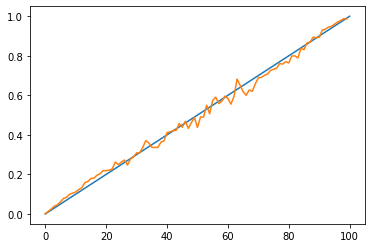

In [52]:
#dd = pd.DataFrame(preds_all.mean(1)[4], columns=all_ich)
dd = pd.DataFrame(preds_all.mean(0), columns=all_ich)

k=5
plt.plot([0,100],[0,1])
plt.plot(train_md[[all_ich[k]]].groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean().values)

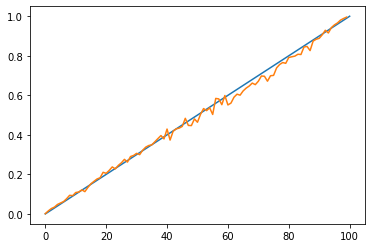

In [53]:
k = 0
dd = pd.DataFrame((preds_all.mean(0)), columns=all_ich)
vals = (train_md[all_ich[k]]*train_md['weights']).groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean()/ \
    train_md['weights'].groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean()

#dd = pd.DataFrame(preds_all.mean(1)[4], columns=all_ich)

plt.plot([0,100],[0,1])
plt.plot(vals.values)

In [54]:
res = np.zeros(6)
for k in range(6):
    res[k] = log_loss(train_md[all_ich[k]], preds_all.mean(0)[:,k], eps=1e-7, labels=[0,1], \
                      sample_weight=train_md.weights)
print((res*class_weights).mean())

0.05479712821048405


In [55]:
res = np.zeros(6)
for k in range(6):
    res[k] = log_loss(train_md[all_ich[k]], preds_all.mean(0)[:,k]**(0.9), eps=1e-7, labels=[0,1], \
                      sample_weight=train_md.weights)
print((res*class_weights).mean())

0.05561250015745392


In [71]:
%run ./Code.ipynb

In [56]:
stats_fn = PATH_DISK/'ensemble'/'stats.v{}'.format(VERSION)
if stats_fn.is_file():
    stats_fn.unlink()

In [38]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, weighted=False)
print('total running time', time.time() - stg)

starting fold 0 target 0
my_len 5
obj  0.09310979823902363
obj  0.09309891297963857
obj  0.09309804988952196
obj  0.0930981000547037
obj  0.09309896379867619
obj  0.09309872791033867
obj  0.09309696636415186
obj  0.09310577281194969
obj  0.09315037307263183
obj  0.0930754032738943
obj  0.09299959267759171
obj  0.09299006453707237
obj  0.09298865419788256
obj  0.09298861236894457
obj  0.09298861192091962
obj  0.0929886119204644
model [0.3048 0.693 ] sum 0.9978355576458361
my_len 5
v32 f0 t0: original ll 0.0946/0.1037, ensemble ll 0.0946/0.1043
running time 2.5843257904052734
starting fold 0 target 1
my_len 5
obj  0.013707903774352548
obj  0.013668306947138213
obj  0.013677671110083705
obj  0.013659076558040151
obj  0.013670961821047382
obj  0.013698009152625017
obj  0.013678181334109692
obj  0.013682868193264454
obj  0.0136436242062214
obj  0.013599800703361883
obj  0.013586728264973041
obj  0.013575470573655912
obj  0.013575170196754483
obj  0.013575116496065997
model [0.2103 0.7697] s

obj  0.040724245382170204
obj  0.040721724340392014
obj  0.04071861357402181
obj  0.04073193634381185
obj  0.04068815321030965
obj  0.0406511290739963
obj  0.040625923027345315
obj  0.04062486152506819
obj  0.04062479493700466
obj  0.04062479394796013
obj  0.040624793944704626
model [0.2579 0.7402] sum 0.9980649334901206
my_len 5
v32 f2 t2: original ll 0.0369/0.0378, ensemble ll 0.0368/0.0380
running time 2.4411075115203857
starting fold 2 target 3
my_len 5
obj  0.023785044573934266
obj  0.023783039084060997
obj  0.023783027452748174
obj  0.023783063841764044
obj  0.023783854860683934
obj  0.02379595479826475
obj  0.023805931565758526
obj  0.023830015043026006
obj  0.023807662408119597
obj  0.02382203389104899
obj  0.02376871082921037
obj  0.02375784249410138
obj  0.023755468661933593
obj  0.02375487401079495
obj  0.02375471727663255
obj  0.023754664906031037
obj  0.02375464914808342
obj  0.02375464616742852
model [0.3229 0.6771] sum 0.9999990602882886
my_len 5
v32 f2 t3: original ll 0

In [39]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, weighted=True)
print('total running time', time.time() - stg)

starting fold 0 target 0
my_len 5
obj  0.10623079061074929
obj  0.10586767371088006
obj  0.10567491655098825
obj  0.10564047980321707
obj  0.1056357694160092
obj  0.10561815833278833
obj  0.10559301852051227
obj  0.1053099705107514
obj  0.10533083028599578
obj  0.1049363153254414
obj  0.1046753527884991
obj  0.10461016818667597
obj  0.10458909578655277
obj  0.10458441695970001
obj  0.10458401374183512
model [9.8578e-01 5.6525e-05] sum 0.9858332541464571
my_len 5
v32 f0 t0: original ll 0.0946/0.1037, ensemble ll 0.0961/0.1034
running time 2.4515163898468018
starting fold 0 target 1
my_len 5
obj  0.022095325566145053
obj  0.022081099296854003
obj  0.022084310912762594
obj  0.022099838404709367
obj  0.02210122231437875
obj  0.022089585513337118
obj  0.02208947306099798
obj  0.022089405998358378
obj  0.02206165062779823
obj  0.022031082806638676
obj  0.02202234730677134
obj  0.022016683408695694
obj  0.02201667494892182
obj  0.022016650587716104
model [0.2649 0.7351] sum 0.9999980392770401

obj  0.04080544347044437
obj  0.04080540732240596
obj  0.04080540727651027
model [0.5152 0.4783] sum 0.9934818769276961
my_len 5
v32 f2 t2: original ll 0.0369/0.0378, ensemble ll 0.0370/0.0377
running time 2.2740840911865234
starting fold 2 target 3
my_len 5
obj  0.021117265699021226
obj  0.021093780851587418
obj  0.021091268304375483
obj  0.021094589799897027
obj  0.02111561027961064
obj  0.02109258524476713
obj  0.021091120175820863
obj  0.021091170436482135
obj  0.0210909616474937
obj  0.021090798116994873
obj  0.02108891773791736
obj  0.021088905176044014
obj  0.0210889051703836
model [0.5521 0.4401] sum 0.9921723496156221
my_len 5
v32 f2 t3: original ll 0.0234/0.0178, ensemble ll 0.0235/0.0178
running time 2.2556989192962646
starting fold 2 target 4
my_len 5
obj  0.06109408607974129
obj  0.06109113806400788
obj  0.061091099946829173
obj  0.06109219143595478
obj  0.06110095186270682
obj  0.06109319928789752
obj  0.06109717557903191
obj  0.061099363135236055
obj  0.06109643829761528

In [40]:
stats = pd.read_csv(PATH_DISK/'ensemble'/'stats.v{}'.format(VERSION))
stats.groupby(['weighted','target'])[['valid_loss','valid_loss_ens','valid_w_loss','valid_w_loss_ens']].mean()

valid_loss  valid_loss_ens  valid_w_loss  valid_w_loss_ens
weighted target                                                            
False    0         0.093610        0.093540      0.105384          0.106104
         1         0.014161        0.014042      0.020850          0.020771
         2         0.039449        0.039363      0.039833          0.040004
         3         0.023672        0.023630      0.020019          0.020086
         4         0.062581        0.062462      0.061597          0.061922
         5         0.077168        0.077033      0.079752          0.080238
True     0         0.093610        0.094939      0.105384          0.104300
         1         0.014161        0.014045      0.020850          0.020759
         2         0.039449        0.039565      0.039833          0.039851
         3         0.023672        0.023733      0.020019          0.020043
         4         0.062581        0.062692      0.061597          0.061628
         5         0.077168        0.077557      0.079752          0.079717

In [41]:
# wegihted models
tt = pd.concat([
stats.loc[stats.weighted == False].groupby('target')[['valid_loss','valid_w_loss',
                                                      'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean(),
stats.loc[stats.weighted == True].groupby('target')[['valid_loss','valid_w_loss',
                                                     'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean()
],axis=1)
tt.columns = ['not weighted','weighted']
tt

,not weighted,weighted
valid_loss,0.057750,0.057750
valid_w_loss,0.061831,0.061831
valid_loss_ens,0.057658,0.058210
valid_w_loss_ens,0.062176,0.061514


In [51]:
# non-weighted models
tt = pd.concat([
stats.loc[stats.weighted == False].groupby('target')[['valid_loss','valid_w_loss',
                                                      'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean(),
stats.loc[stats.weighted == True].groupby('target')[['valid_loss','valid_w_loss',
                                                     'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean()
],axis=1)
tt.columns = ['not weighted','weighted']
tt

,not weighted,weighted
valid_loss,0.057661,0.057661
valid_w_loss,0.062715,0.062715
valid_loss_ens,0.057638,0.057799
valid_w_loss_ens,0.062705,0.062648


In [40]:
# wegihted models OLD
tt = pd.concat([
stats.loc[stats.weighted == False].groupby('target')[['valid_loss','valid_w_loss',
                                                      'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean(),
stats.loc[stats.weighted == True].groupby('target')[['valid_loss','valid_w_loss',
                                                     'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean()
],axis=1)
tt.columns = ['not weighted','weighted']
tt

,not weighted,weighted
valid_loss,0.057773,0.057773
valid_w_loss,0.061811,0.061811
valid_loss_ens,0.057676,0.058197
valid_w_loss_ens,0.062118,0.061454


In [42]:
np.set_printoptions(precision=4)
res2_all = []
for target in range(6):
    res2 = np.zeros((3, 2))
    for fold in range(3):
        model = pickle.load(open(PATH_DISK/'ensemble'/'model.f{}.t{}.v{}'
                                 .format(fold,target,VERSION),'rb'))
        res2[fold] = model.x
        #print(fold,target,model.x)
    print(target, res2.mean(0), res2.mean(0).sum())
    res2_all.append(res2)
print('total', np.stack(res2_all).mean((0,1)), np.stack(res2_all).mean((0,1)).sum())

0 [0.9876 0.0018] 0.9894477407141307
1 [0.1925 0.8075] 0.9999976546133494
2 [0.527 0.462] 0.988990555803149
3 [0.4246 0.5643] 0.9888406843499173
4 [0.5151 0.4738] 0.9889344892215379
5 [0.7454 0.2461] 0.9914763656881276
total [0.5654 0.4259] 0.9912812483983686


In [43]:
preds3 = np.stack([pickle.load(open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'rb')) for ds in my_datasets3])
preds5 = np.stack([pickle.load(open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'rb')) for ds in my_datasets5])

In [63]:
preds = np.concatenate([preds3.mean((1,2)), preds5.mean((1,2))],axis=0)

In [45]:
yuval_test = pickle.load(open(PATH_DISK/'ensemble/ensemble_test_image_ids.pkl','rb'))
assert len(yuval_test) == len(test_md)

df = pd.DataFrame(np.arange(len(yuval_test)), columns=['yuval_idx'])
df.index = yuval_test
test_md = test_md.join(df, on = 'img_id')

In [55]:
names_y3 = [
    #'model_Densenet201_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_{}.pkl',
    #'model_Densenet161_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_Densenet169_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnext101_32x4d_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnet101_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
           ]

In [56]:
names_y5 = [
    'model_se_resnext101_32x4d_version_new_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnet101_version_new_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnet101_version_new_splits_focal_fullhead_resmodel_pool2_over3_type_test_pred_ensamble_split_{}.pkl',
           ]

In [57]:
preds_y3 = np.stack([torch.sigmoid(torch.stack([torch.stack(pickle.load(
    open(PATH_DISK/'yuval/OOF'/name.format(fold),'rb'))) for fold in range(3)])).numpy() for name in names_y3])

In [58]:
preds_y5 = np.stack([torch.sigmoid(torch.stack([torch.stack(pickle.load(
    open(PATH_DISK/'yuval/OOF'/name.format(fold),'rb'))) for fold in range(5)])).numpy() for name in names_y5])

In [64]:
preds_y = np.concatenate([preds_y3.mean((1,2)), preds_y5.mean((1,2))],axis=0)

In [65]:
preds_y = preds_y[:,test_md.yuval_idx]
preds_y = preds_y[:,:,np.array([5,0,1,2,3,4])]

In [66]:
preds = np.concatenate([preds, preds_y], axis=0)

In [68]:
preds = preds[ds_mask]

In [69]:
preds.shape

(11, 78545, 6)

In [70]:
preds = predBounding(preds)

any too low inconsistencies
1 class: 0.00043171546131632704
2 class: 0.013115816642457421
3 class: 0.008188704795745346
4 class: 0.015698007511617543
5 class: 0.04870514296957737
total 0.08165440772226691
any too high inconsistencies
total 0.23122587514974044


In [105]:
#predictions = preds.mean((0,1))

In [71]:
stg = time.time()

test_preds_trgt = []
print('version', VERSION, 'my_len', my_len)
for target in range(6):
    
    test_preds_fold = []
    for fold in range(3):
        X = np.stack([preds[:my_len,:,target].mean(0), 
                      preds[my_len:,:,target].mean(0)], axis=0)
        
        model = pickle.load(open(PATH_DISK/'ensemble'/'model.f{}.t{}.v{}'.format(fold,target,VERSION),'rb'))
        test_preds_fold.append((X*np.expand_dims(model.x, axis=1)).sum(0))
    
    test_preds_trgt.append(np.stack(test_preds_fold).mean(0))

predictions = np.stack(test_preds_trgt,axis=1)

print('total running time', time.time() - stg)

version 32 my_len 5
total running time 0.0522921085357666


In [72]:
np.corrcoef(preds[:,:,0])

array([[1.    , 0.992 , 0.9932, 0.993 , 0.9929, 0.9927, 0.9892, 0.9906,
        0.9916, 0.9915, 0.9913],
       [0.992 , 1.    , 0.9968, 0.995 , 0.9951, 0.9903, 0.9959, 0.9924,
        0.9949, 0.9931, 0.9932],
       [0.9932, 0.9968, 1.    , 0.9967, 0.9966, 0.9915, 0.9932, 0.9929,
        0.9968, 0.9941, 0.9939],
       [0.993 , 0.995 , 0.9967, 1.    , 0.9986, 0.9909, 0.9909, 0.9936,
        0.9936, 0.996 , 0.9954],
       [0.9929, 0.9951, 0.9966, 0.9986, 1.    , 0.9908, 0.9911, 0.9938,
        0.9937, 0.9955, 0.9963],
       [0.9927, 0.9903, 0.9915, 0.9909, 0.9908, 1.    , 0.9915, 0.9923,
        0.9936, 0.9937, 0.9935],
       [0.9892, 0.9959, 0.9932, 0.9909, 0.9911, 0.9915, 1.    , 0.9947,
        0.9969, 0.9949, 0.9948],
       [0.9906, 0.9924, 0.9929, 0.9936, 0.9938, 0.9923, 0.9947, 1.    ,
        0.9959, 0.997 , 0.9969],
       [0.9916, 0.9949, 0.9968, 0.9936, 0.9937, 0.9936, 0.9969, 0.9959,
        1.    , 0.9968, 0.9965],
       [0.9915, 0.9931, 0.9941, 0.996 , 0.9955, 0.9937,

In [73]:
predictions.shape

(78545, 6)

# Submitting

In [74]:
id_column = np.array([a + '_' + b for a in test_md.SOPInstanceUID for b in all_ich])
sub = pd.DataFrame({'ID': id_column, 'Label': predictions.reshape(-1)})
sub.to_csv(PATH/'sub.csv', index=False)

## Sanity checks

In [75]:
test_md['pred_any'] = predictions[:,0]

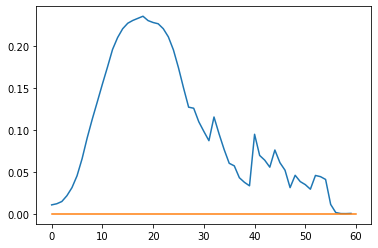

In [76]:
plt.plot(test_md[['pos_idx','pred_any']].groupby('pos_idx').mean())
plt.plot([0,60],[0,0])

In [77]:
# weighted models + weighted ensembling
#0 [2.14e-04 2.50e-04 3.15e-04 2.15e-03 9.88e-01 9.93e-01 9.94e-01]
#1 [4.46e-06 5.32e-06 6.88e-06 8.58e-05 1.34e-01 6.16e-01 9.24e-01]
#2 [4.88e-05 5.54e-05 6.88e-05 3.27e-04 9.65e-01 9.86e-01 9.90e-01]
#3 [1.78e-05 2.00e-05 2.42e-05 1.04e-04 9.52e-01 9.77e-01 9.81e-01]
#4 [6.56e-05 7.67e-05 9.50e-05 4.71e-04 9.41e-01 9.85e-01 9.89e-01]
#5 [9.93e-05 1.21e-04 1.53e-04 9.91e-04 9.42e-01 9.86e-01 9.92e-01]

# weighted models + non-weighted ensembling
#0 [9.25e-05 1.11e-04 1.41e-04 1.60e-03 9.93e-01 9.97e-01 9.99e-01]
#1 [8.16e-06 9.69e-06 1.24e-05 9.28e-05 1.31e-01 5.91e-01 8.94e-01]
#2 [2.38e-05 2.66e-05 3.46e-05 2.46e-04 9.73e-01 9.91e-01 9.94e-01]
#3 [1.25e-05 1.40e-05 1.71e-05 8.06e-05 9.66e-01 9.90e-01 9.94e-01]
#4 [3.27e-05 3.80e-05 4.71e-05 3.55e-04 9.51e-01 9.91e-01 9.94e-01]
#5 [4.51e-05 5.74e-05 7.40e-05 7.90e-04 9.46e-01 9.89e-01 9.94e-01]

# non-weighted models + non-weighted ensembling
#0 [1.10e-04 1.24e-04 1.55e-04 1.27e-03 9.93e-01 9.97e-01 9.98e-01]
#1 [8.61e-06 9.98e-06 1.23e-05 8.77e-05 1.36e-01 5.73e-01 8.74e-01]
#2 [2.34e-05 2.66e-05 3.41e-05 2.12e-04 9.73e-01 9.91e-01 9.95e-01]
#3 [1.08e-05 1.25e-05 1.50e-05 6.10e-05 9.67e-01 9.92e-01 9.96e-01]
#4 [3.18e-05 3.68e-05 4.48e-05 3.03e-04 9.51e-01 9.91e-01 9.94e-01]
#5 [4.72e-05 5.48e-05 6.86e-05 6.83e-04 9.41e-01 9.88e-01 9.92e-01]

np.set_printoptions(precision=2)
for k in range(6):
    print(k,np.quantile(predictions[:,k],[0.0001,0.001,0.01,0.5,0.99,0.999,0.9999]))

0 [2.24e-04 2.57e-04 3.13e-04 2.20e-03 9.82e-01 9.87e-01 9.88e-01]
1 [1.19e-05 1.38e-05 1.69e-05 1.03e-04 1.41e-01 5.94e-01 8.96e-01]
2 [5.03e-05 5.60e-05 7.01e-05 3.34e-04 9.59e-01 9.80e-01 9.84e-01]
3 [2.07e-05 2.35e-05 2.80e-05 1.09e-04 9.53e-01 9.80e-01 9.83e-01]
4 [7.11e-05 8.17e-05 9.83e-05 4.79e-04 9.33e-01 9.76e-01 9.81e-01]
5 [1.12e-04 1.33e-04 1.67e-04 1.03e-03 9.32e-01 9.77e-01 9.84e-01]


In [78]:
# weighted models + weighted ensembling
#array([0.1361, 0.0056, 0.0429, 0.0295, 0.0468, 0.0569])

# weighted models + non-weighted ensembling
#array([0.1335, 0.0055, 0.0423, 0.0298, 0.0466, 0.0556])

# non-weighted models + non-weighted ensembling
#array([0.1313, 0.0057, 0.0421, 0.0297, 0.0464, 0.0544])

np.set_printoptions(precision=4)
predictions.mean(0)

array([0.1357, 0.0059, 0.0428, 0.0296, 0.0466, 0.0568])

In [79]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.1357189110611546

In [93]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13418304425483424

In [80]:
sub = sub.sort_values('ID').reset_index(drop=True)
best_sub = pd.read_csv(PATH/'submission56.csv').sort_values('ID').reset_index(drop=True)

In [90]:
best_sub.loc[range(0,len(sub),6), 'Label'].mean()

0.1332598999809263

In [81]:
sp.stats.spearmanr(sub.loc[range(0,len(sub),6), 'Label'], 
                   best_sub.loc[range(0,len(sub),6), 'Label'])

SpearmanrResult(correlation=0.984279901141253, pvalue=0.0)

In [124]:
sp.stats.spearmanr(sub.loc[range(0,len(sub),6), 'Label'], 
                   best_sub.loc[range(0,len(sub),6), 'Label'])

SpearmanrResult(correlation=0.985530472858697, pvalue=0.0)

In [82]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9985362623461371

In [126]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9986350935991319

## Submission

In [83]:
!~/.local/bin/kaggle competitions submit rsna-intracranial-hemorrhage-detection -f ~/sub.csv -m "GCP, my weighted + yuval, 32TTA, weighted ensembling"

100%|██████████████████████████████████████| 20.8M/20.8M [00:03<00:00, 6.00MB/s]
Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [ ]:
!kaggle competitions submit rsna-intracranial-hemorrhage-detection -f C:/StudioProjects/Hemorrhage/sub.csv -m "GCP, d161+d169+d201+s101+yd161, 8TTA, ensemble, bounds"